# KMeans Clustering With Water Data
---

In this notebook, we will delve into various aspects of water supply and usage, examining their relationships and identifying patterns through KMeans clustering. By applying clustering algorithms, we can gain insights into the complex interplay between different water-related factors and uncover distinct clusters within the dataset. Through variable exploration and visualization, we can identify important trends and patterns in water usage, ultimately contributing to a deeper understanding of how communities, industries, policy makers, and individuals can better preserve this resource and offset climate-related impacts. 

# Contents
- [Water Withdrawn From Public Supply](#Water-Withdrawn-From-Public-Supply)
- [Self Supplied Industrial Withdrawal](#Self-Supplied-Industrial-Withdrawal)
- [Irrigation Withdrawal and Reclaimed Wastewaster](#Irrigation-Withdrawal-and-Reclaimed-Wastewaster)
- [Thermoelectric Withdrawal](#Thermoelectric-Withdrawal)
- [Total Withdrawals vs. Public Supply](#Total-Withdrawals-vs.-Public-Supply)
- [Revisualizing to 300 Clusters](#Revisualizing-to-300-Clusters)
    - [Showing 25 Clusters](#Showing-25-Clusters)
    - [Showing 300 Clusters](#Showing-300-Clusters)
- [Output Clusters For Tableau Model](#Output-Clusters-For-Tableau-Model)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

matplotlib.style.use('ggplot')

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
os.getcwd()

'C:\\Users\\farah\\Documents\\General Assembly DSI\\DSI-508\\Projects\\project-5\\project-5data'

In [3]:
df = pd.read_csv('../group-project/clean-data/combined.csv')
df['fips'] = df.fips.astype('object')

In [4]:
df.head()

,state,countyname,fips,lon,lat,tp_totpop,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,...,flag_net,flag_hi,flag_hx,flag_wbgt,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,ME,Washington,23029,-67.6361,45.0363,31.625,9.446,1.900,11.346,1.38,...,0.0,0.0,0.0,0.0,86.78,13.22,0.00,0.0,0.0,0.0
1,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.000,10.497,1.04,...,0.0,0.0,0.0,0.0,75.07,24.93,2.25,0.0,0.0,0.0
2,GA,Liberty,13179,-81.2103,31.7093,62.467,51.264,0.000,51.264,6.42,...,0.0,0.0,0.0,0.0,84.02,15.98,0.21,0.0,0.0,0.0
3,CT,Hartford,9003,-72.7328,41.8064,895.841,78.563,671.826,750.389,12.78,...,0.0,0.0,0.0,0.0,39.70,60.30,30.55,0.0,0.0,0.0
4,CT,Tolland,9013,-72.3365,41.8550,151.420,45.125,46.224,91.349,3.29,...,0.0,0.0,0.0,0.0,40.99,59.01,29.40,0.0,0.0,0.0


In [5]:
df.dtypes

state                   object
countyname              object
fips                    object
lon                    float64
lat                    float64
                        ...   
abnormally_dry         float64
moderate_drought       float64
severe_drought         float64
extreme_drought        float64
exceptional_drought    float64
Length: 85, dtype: object

In [6]:
df.head()

,state,countyname,fips,lon,lat,tp_totpop,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,...,flag_net,flag_hi,flag_hx,flag_wbgt,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,ME,Washington,23029,-67.6361,45.0363,31.625,9.446,1.900,11.346,1.38,...,0.0,0.0,0.0,0.0,86.78,13.22,0.00,0.0,0.0,0.0
1,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.000,10.497,1.04,...,0.0,0.0,0.0,0.0,75.07,24.93,2.25,0.0,0.0,0.0
2,GA,Liberty,13179,-81.2103,31.7093,62.467,51.264,0.000,51.264,6.42,...,0.0,0.0,0.0,0.0,84.02,15.98,0.21,0.0,0.0,0.0
3,CT,Hartford,9003,-72.7328,41.8064,895.841,78.563,671.826,750.389,12.78,...,0.0,0.0,0.0,0.0,39.70,60.30,30.55,0.0,0.0,0.0
4,CT,Tolland,9013,-72.3365,41.8550,151.420,45.125,46.224,91.349,3.29,...,0.0,0.0,0.0,0.0,40.99,59.01,29.40,0.0,0.0,0.0


In [7]:
df = df.set_index('fips')

In [8]:
df.head()

,state,countyname,lon,lat,tp_totpop,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,...,flag_net,flag_hi,flag_hx,flag_wbgt,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
fips,,,,,,,,,,,,,,,,,,,,,
23029,ME,Washington,-67.6361,45.0363,31.625,9.446,1.900,11.346,1.38,0.19,...,0.0,0.0,0.0,0.0,86.78,13.22,0.00,0.0,0.0,0.0
13191,GA,McIntosh,-81.2646,31.5329,13.969,10.497,0.000,10.497,1.04,0.00,...,0.0,0.0,0.0,0.0,75.07,24.93,2.25,0.0,0.0,0.0
13179,GA,Liberty,-81.2103,31.7093,62.467,51.264,0.000,51.264,6.42,0.00,...,0.0,0.0,0.0,0.0,84.02,15.98,0.21,0.0,0.0,0.0
9003,CT,Hartford,-72.7328,41.8064,895.841,78.563,671.826,750.389,12.78,46.44,...,0.0,0.0,0.0,0.0,39.70,60.30,30.55,0.0,0.0,0.0
9013,CT,Tolland,-72.3365,41.8550,151.420,45.125,46.224,91.349,3.29,1.64,...,0.0,0.0,0.0,0.0,40.99,59.01,29.40,0.0,0.0,0.0


# Water Withdrawn From Public Supply

In [9]:
df1 = df.filter(items=['ps_wtotl', 'do_psdel', 'state', 'fips'])
df1.head()

,ps_wtotl,do_psdel,state
fips,,,
23029,1.57,0.58,ME
13191,1.04,0.94,GA
13179,6.42,3.18,GA
9003,59.22,25.29,CT
9013,4.93,3.83,CT


In [10]:
df1.shape

(3196, 3)

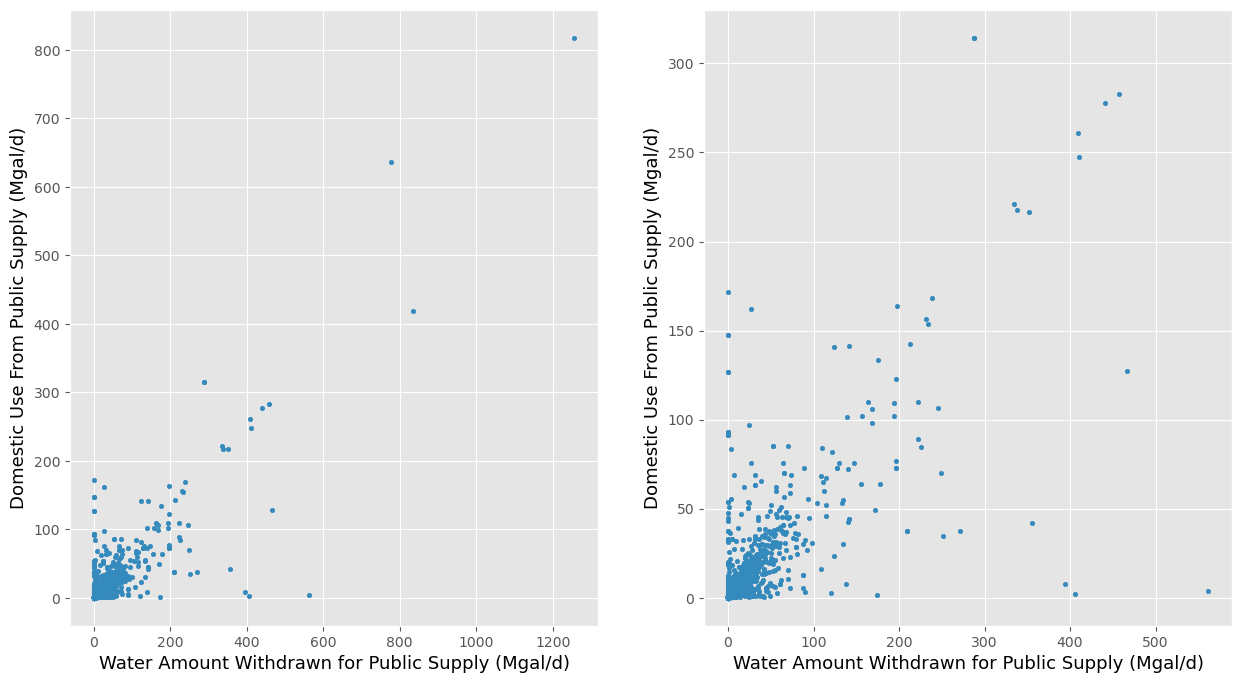

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
df.plot(kind="scatter", x="ps_wtotl", y="do_psdel", s=10, ax=ax[0])
ax[0].set_xlabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=13)
ax[0].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=13);

#remove outliers for better visual
df1_chk = df1[df1.ps_wtotl < 600]
df1_chk.plot(kind="scatter", x="ps_wtotl", y="do_psdel", s=10, ax=ax[1])
ax[1].set_xlabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=13)
ax[1].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=13);

## KMeans

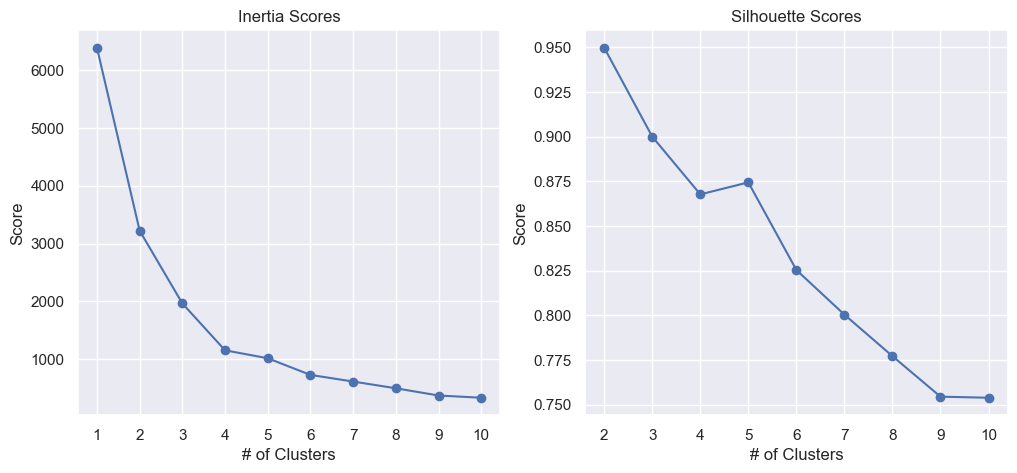

In [12]:
X = df1[['ps_wtotl', 'do_psdel']]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

In [13]:
# Fit a K-means clustering model
km1 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km1.fit(Z)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [14]:
df1['cluster'] = km1.labels_
df1.head()

,ps_wtotl,do_psdel,state,cluster
fips,,,,
23029,1.57,0.58,ME,0
13191,1.04,0.94,GA,0
13179,6.42,3.18,GA,0
9003,59.22,25.29,CT,2
9013,4.93,3.83,CT,0


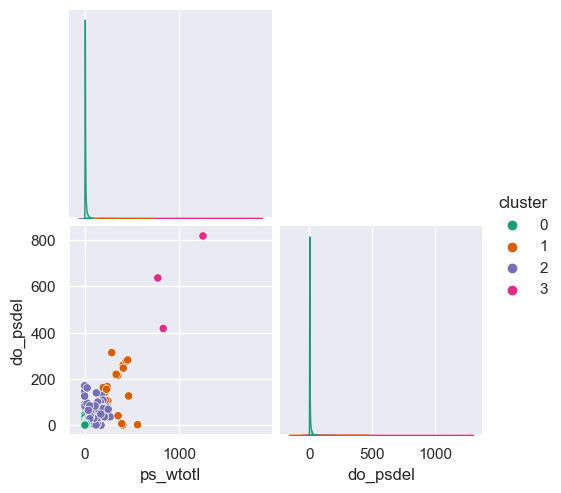

In [15]:
sns.pairplot(data = df1,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = ['ps_wtotl', 'do_psdel'],
             y_vars = ['ps_wtotl', 'do_psdel'],
             hue = 'cluster');

<Figure size 600x400 with 0 Axes>

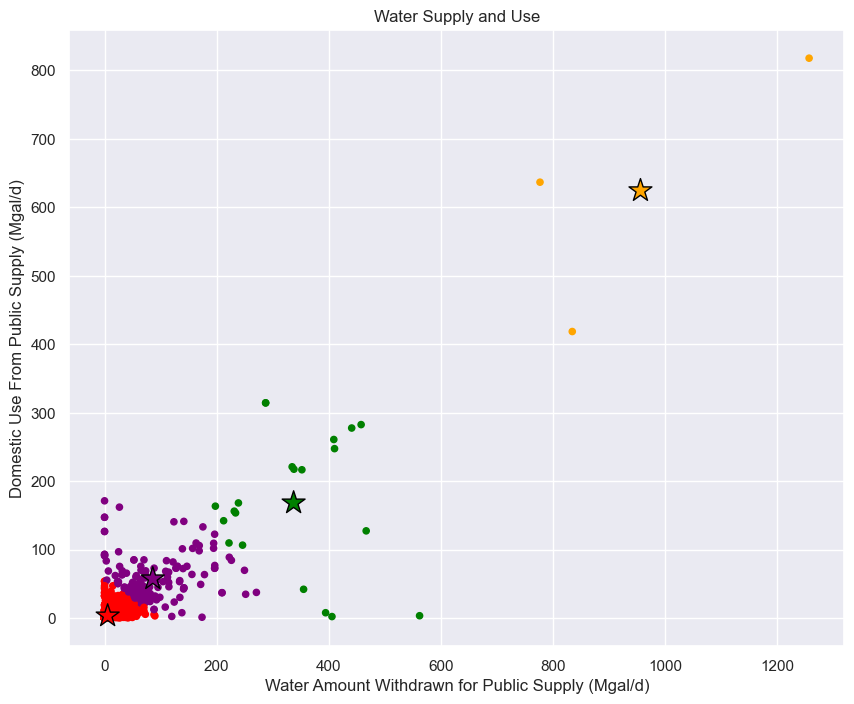

In [16]:
centroids = sc.inverse_transform(km1.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=['ps_wtotl', 'do_psdel']
)

plt.figure(figsize=(6, 4))

colors = ["red", "green", "purple", "orange"]
df1['color'] = df1['cluster'].map(lambda p: colors[p])

# Plot points
ax = df1.plot(
    kind="scatter",
    x="ps_wtotl",
    y="do_psdel",
    figsize=(10, 8),
    c=df1['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ps_wtotl",
    y="do_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax
)

# Labels
plt.title('Water Supply and Use')
plt.xlabel('Water Amount Withdrawn for Public Supply (Mgal/d)')
plt.ylabel('Domestic Use From Public Supply (Mgal/d)')

# Show the plot
plt.show();

# Self Supplied Industrial Withdrawal

In [17]:
keep = ['to_wtotl', 'in_wtotl']
df2 = df.filter(items=keep)
df2.head()

,to_wtotl,in_wtotl
fips,,
23029,47.75,27.37
13191,1.48,0.02
13179,18.46,11.06
9003,260.45,106.27
9013,9.67,1.00


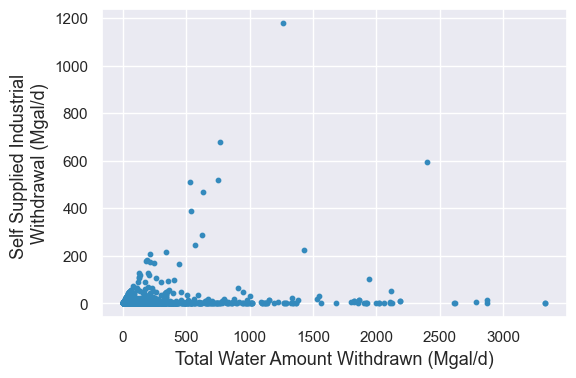

In [18]:
df2 = df.filter(items=keep)

df2.plot(kind="scatter", x="to_wtotl", y="in_wtotl", figsize=(6,4), s=10)
plt.xlabel("Total Water Amount Withdrawn (Mgal/d)", fontsize=13)
plt.ylabel("Self Supplied Industrial \nWithdrawal (Mgal/d)", fontsize=13);

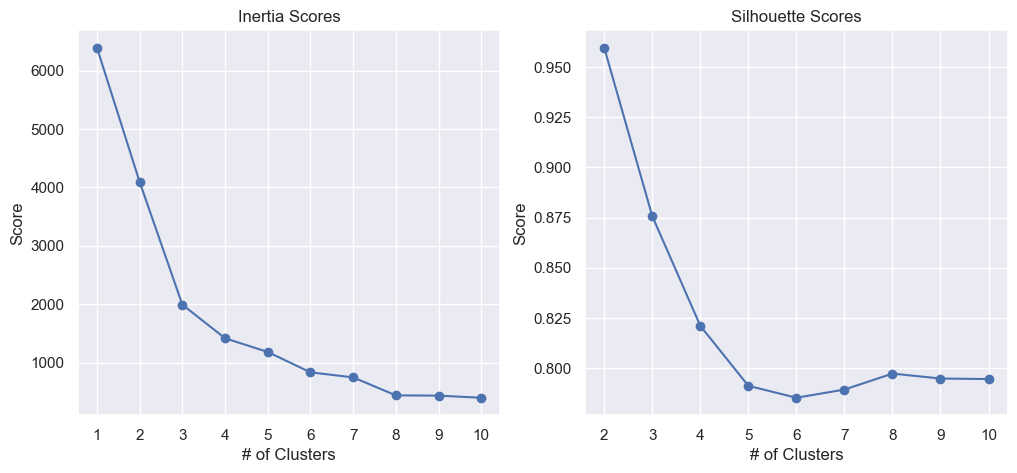

In [19]:
# Define X
#X = df1[['ps_wtotl', 'do_psdel', 'state', 'fips']]
#X = pd.get_dummies(X, columns = ['state', 'fips'], drop_first=True)
X = df2[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

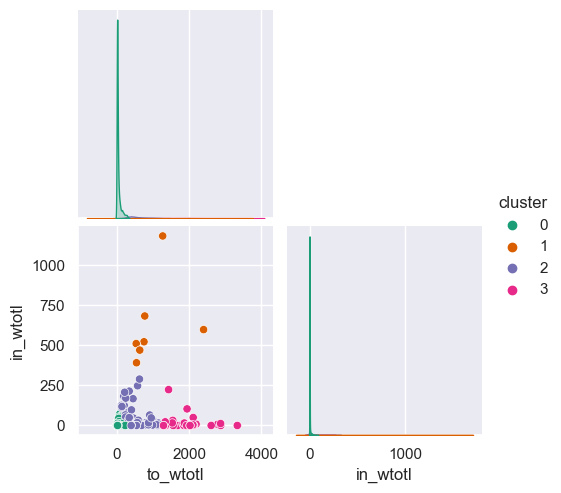

In [20]:
km2 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km2.fit(Z)

df2['cluster'] = km2.labels_
df2.head()

sns.pairplot(data = df2,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');


<Figure size 600x400 with 0 Axes>

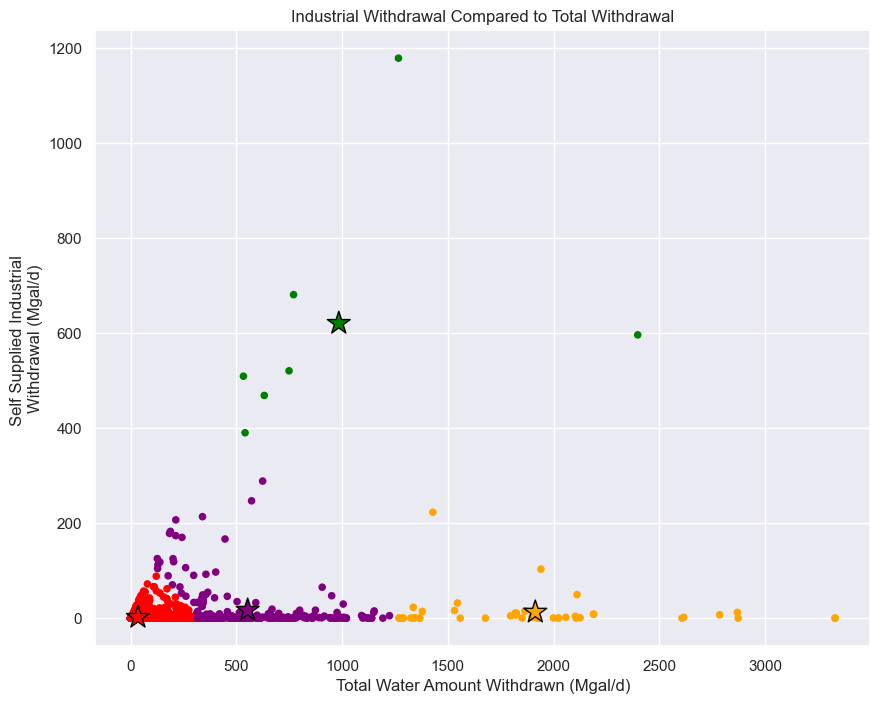

In [21]:
centroids = sc.inverse_transform(km2.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

plt.figure(figsize=(6, 4))

colors = ["red", "green", "purple", "orange"]
df2['color'] = df2['cluster'].map(lambda p: colors[p])

# Plot points
ax = df2.plot(
    kind="scatter",
    x="to_wtotl",
    y="in_wtotl",
    figsize=(10, 8),
    c=df2['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="to_wtotl",
    y="in_wtotl",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax
)

# Labels
plt.title('Industrial Withdrawal Compared to Total Withdrawal')
plt.xlabel('Total Water Amount Withdrawn (Mgal/d)')
plt.ylabel('Self Supplied Industrial \nWithdrawal (Mgal/d)')

# Show the plot
plt.show();

# Irrigation Withdrawal and Reclaimed Wastewaster

In [22]:
keep = ['ir_wfrto', 'ir_recww', 'ic_wfrto', 'ic_recww', 'ig_wfrto', 'ig_recww']
df3 = df.filter(items=keep)
df3.head()

,ir_wfrto,ir_recww,ic_wfrto,ic_recww,ig_wfrto,ig_recww
fips,,,,,,
23029,7.37,0.0,7.34,0.0,0.03,0.0
13191,0.16,0.0,0.00,0.0,0.16,0.0
13179,0.00,0.0,0.00,0.0,0.00,0.0
9003,4.09,0.0,2.41,0.0,1.68,0.0
9013,0.50,0.0,0.23,0.0,0.27,0.0


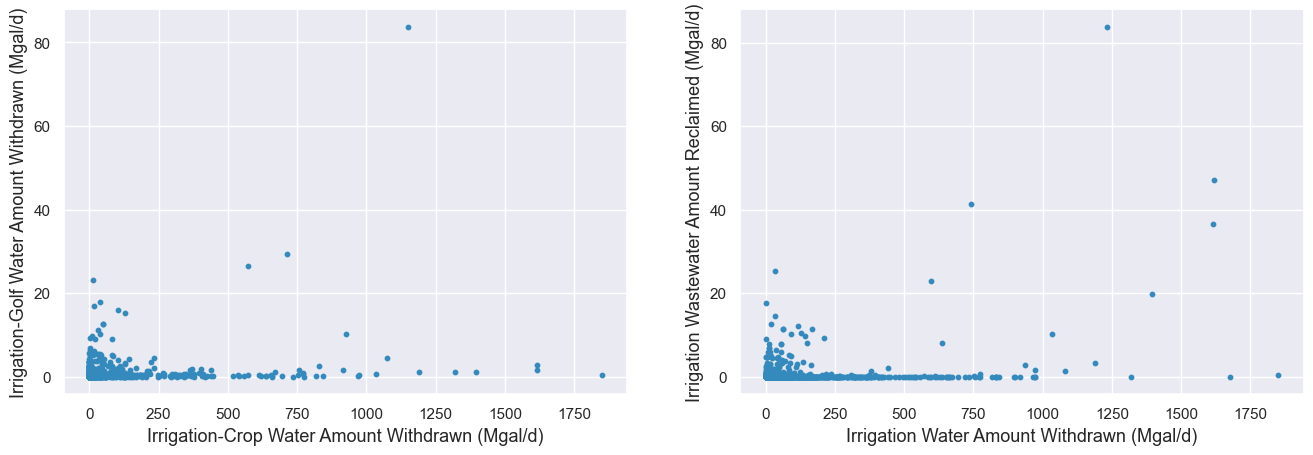

In [23]:
df3 = df.filter(items=keep)

fig, ax = plt.subplots(1,2, figsize=(10,6))
df3.plot(kind="scatter", x="ic_wfrto", y="ig_wfrto", figsize=(16,5), s=10, ax=ax[0])
ax[0].set_xlabel("Irrigation-Crop Water Amount Withdrawn (Mgal/d)", fontsize=13)
ax[0].set_ylabel("Irrigation-Golf Water Amount Withdrawn (Mgal/d)", fontsize=13);

df3.plot(kind="scatter", x="ir_wfrto", y="ir_recww", figsize=(16,5), s=10, ax=ax[1])
ax[1].set_xlabel("Irrigation Water Amount Withdrawn (Mgal/d)", fontsize=13)
ax[1].set_ylabel("Irrigation Wastewater Amount Reclaimed (Mgal/d)", fontsize=13);

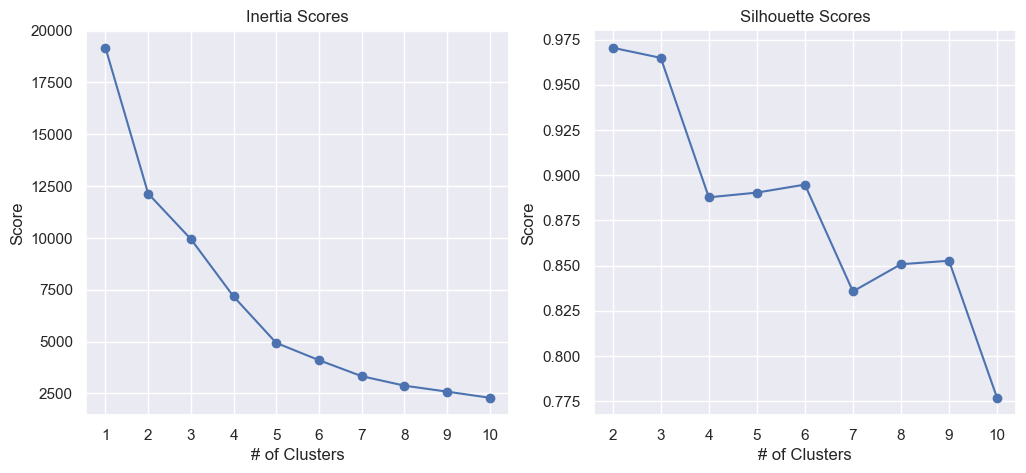

In [24]:
# Define X
X = df3[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

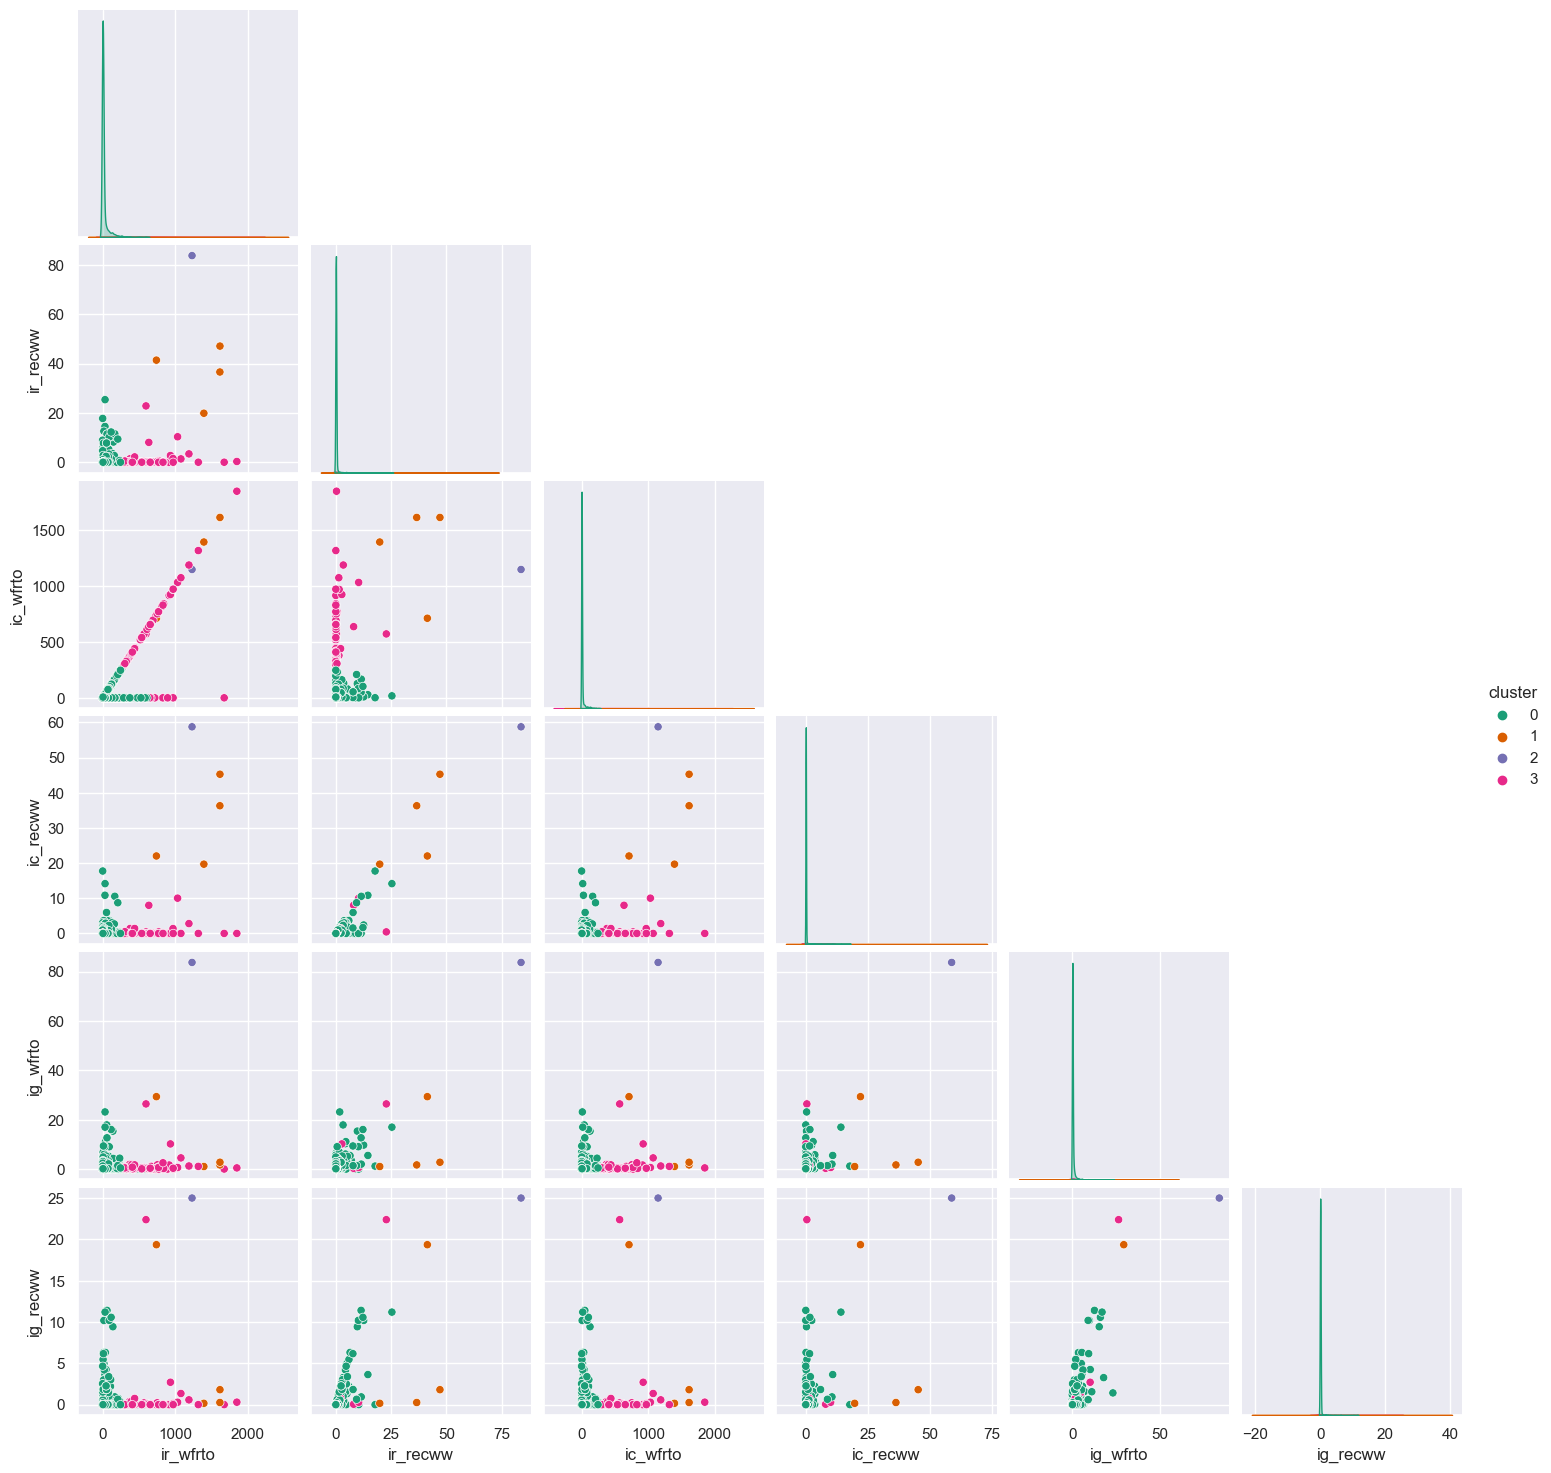

In [25]:
km3 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km3.fit(Z)

df3['cluster'] = km3.labels_
df3.head()

sns.pairplot(data = df3,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');

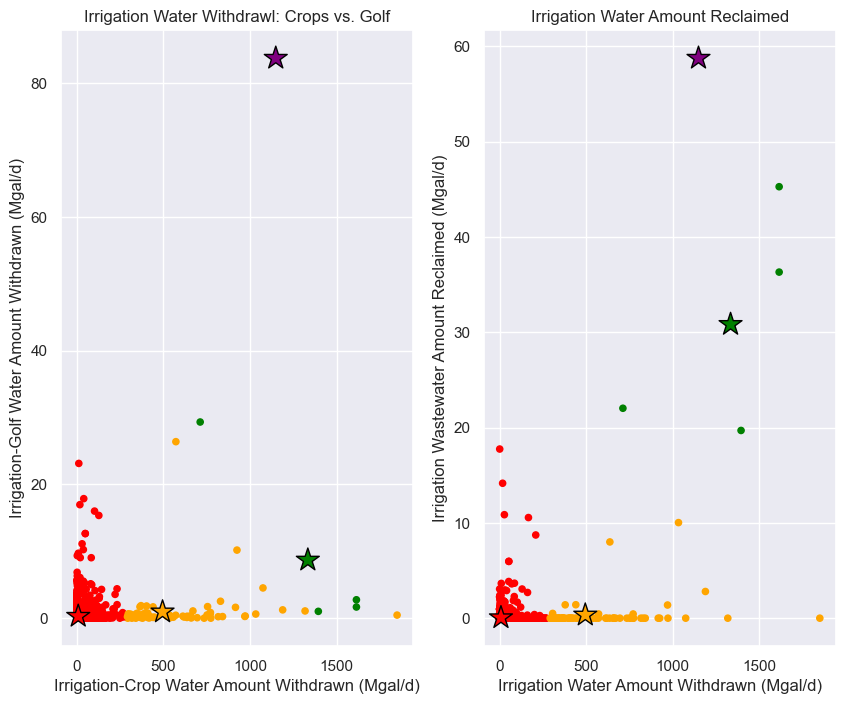

In [26]:
centroids = sc.inverse_transform(km3.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

fig, ax = plt.subplots(1,2, figsize=(16, 6))

colors = ["red", "green", 'purple', 'orange']
df3['color'] = df3['cluster'].map(lambda p: colors[p])

# Plot points
df3.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ig_wfrto",
    figsize=(10, 8),
    c=df3['color'],
    ax=ax[0]
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ig_wfrto",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0]
)

# Labels
ax[0].set_title('Irrigation Water Withdrawl: Crops vs. Golf')
ax[0].set_xlabel('Irrigation-Crop Water Amount Withdrawn (Mgal/d)')
ax[0].set_ylabel('Irrigation-Golf Water Amount Withdrawn (Mgal/d)')



# Plot points
df3.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ic_recww",
    figsize=(10, 8),
    c=df3['color'],
    ax=ax[1]
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ic_recww",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1]
)

# Labels
ax[1].set_title('Irrigation Water Amount Reclaimed')
ax[1].set_xlabel('Irrigation Water Amount Withdrawn (Mgal/d)')
ax[1].set_ylabel('Irrigation Wastewater Amount Reclaimed (Mgal/d)')

# Show the plot
plt.show();

# Thermoelectric Withdrawal

In [27]:
keep = ['po_wtotl', 'pc_wtotl', 
        'po_psdel', 'pc_psdel', 
        'pt_wtotl', 'pt_recww', 
                    'pt_psdel', 
        'po_recww', 'pc_recww'
       ]
df4 = df.filter(items=keep)
df4.head()

,po_wtotl,pc_wtotl,po_psdel,pc_psdel,pt_wtotl,pt_recww,pt_psdel,po_recww,pc_recww
fips,,,,,,,,,
23029,0.00,0.35,0.0,0.00,0.35,0.0,0.00,0.0,0.0
13191,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0
13179,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0
9003,71.56,0.00,0.0,0.43,71.56,0.0,0.43,0.0,0.0
9013,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0


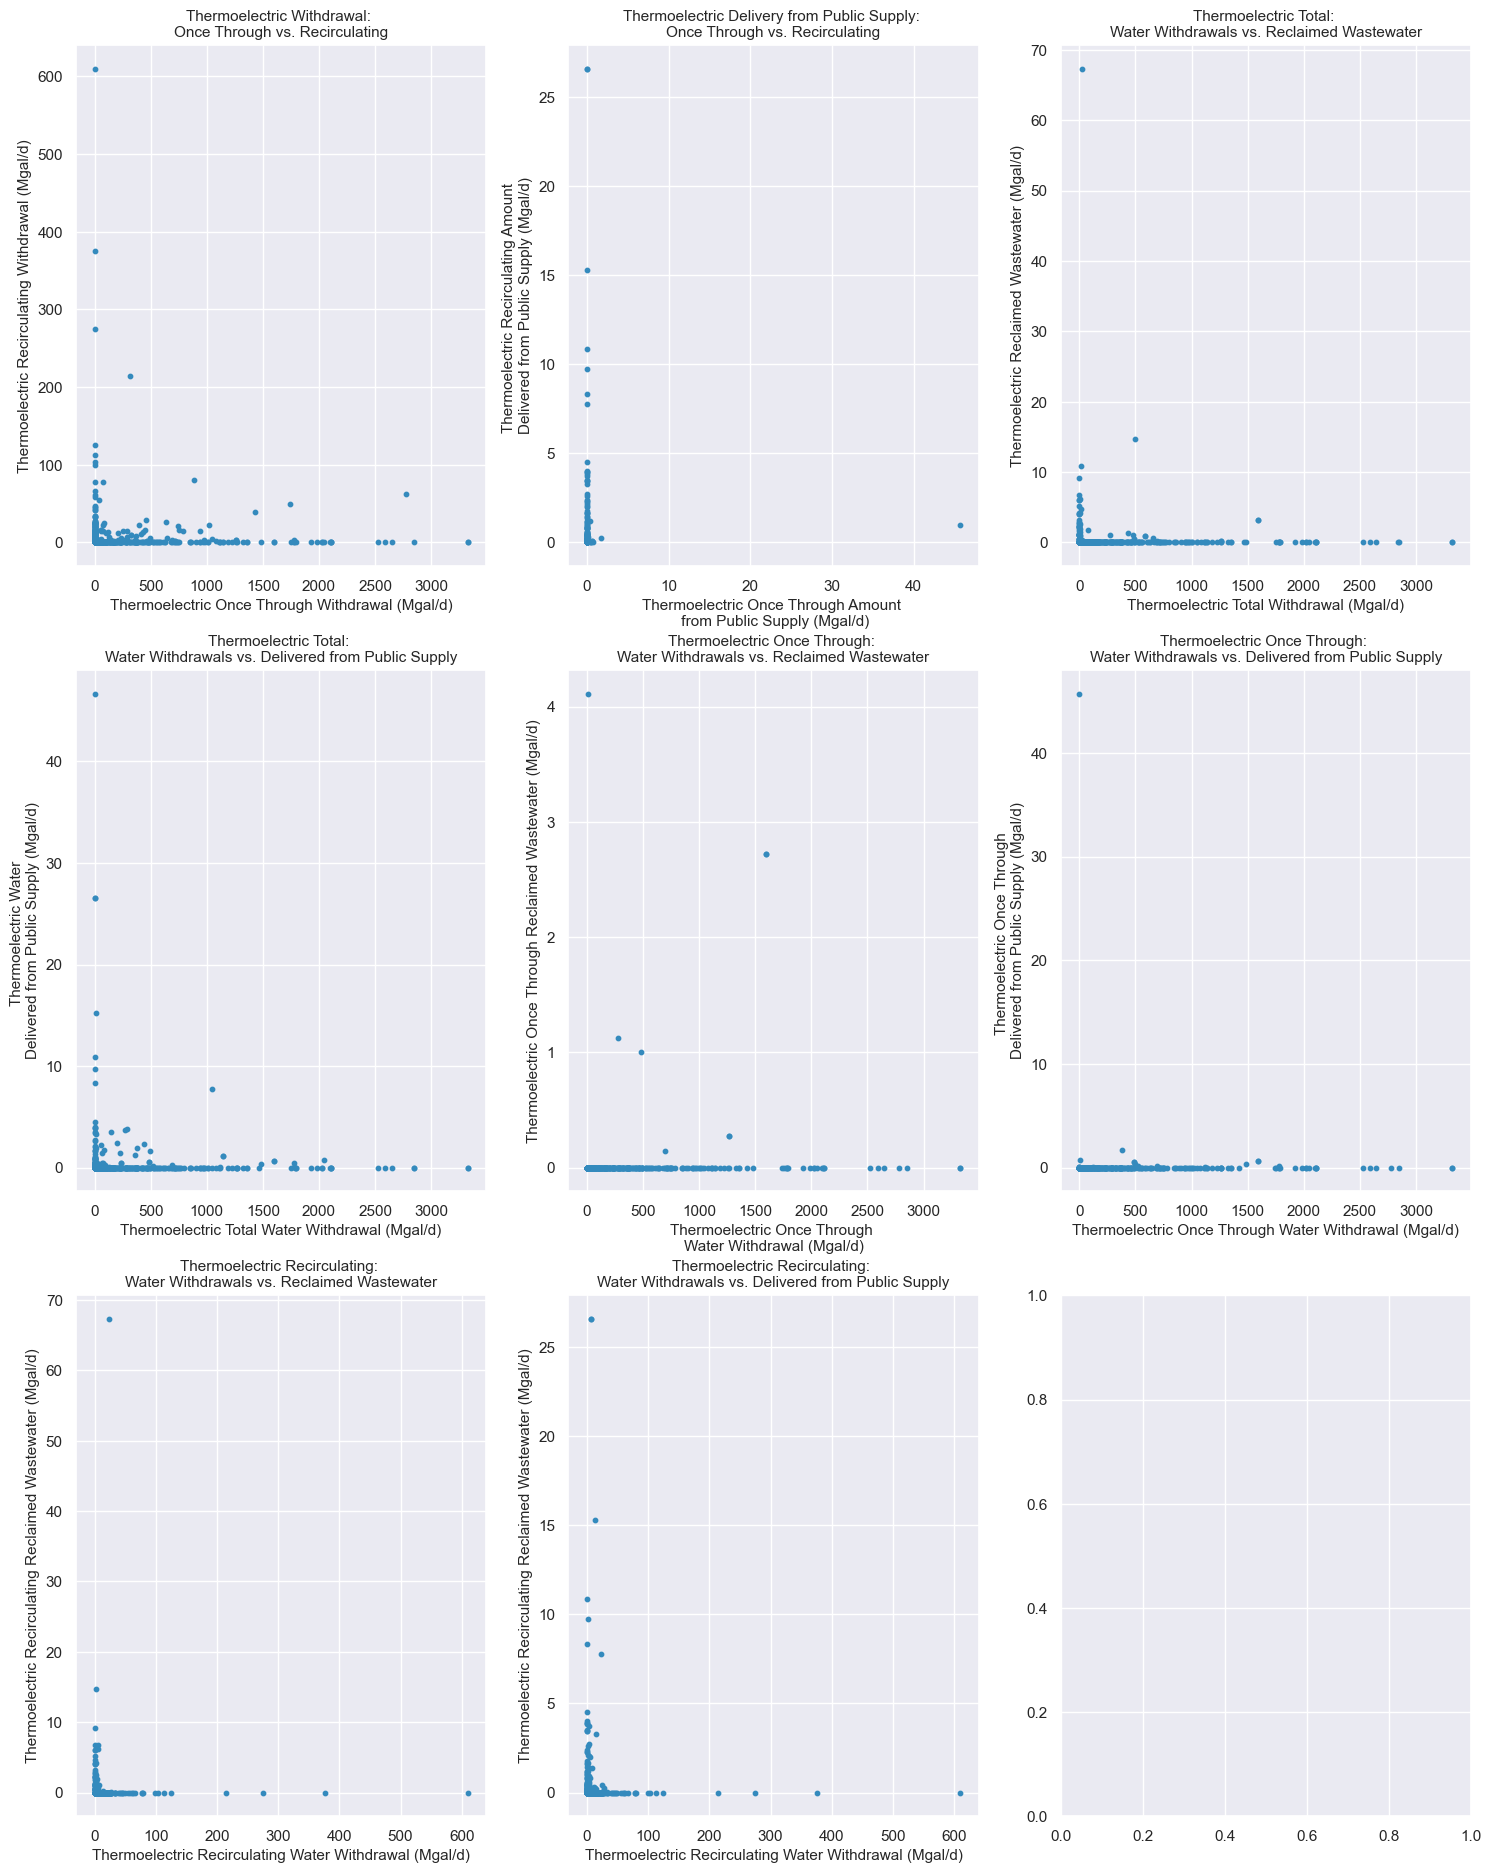

In [28]:
df4 = df.filter(items=keep)

fig, ax = plt.subplots(3,3)
f = 11
fg = (18,23)

# 4a - Thermo Once Thru vs. Thermo Recirculating Withdrawal
df4.plot(kind="scatter", x="po_wtotl", y="pc_wtotl", figsize=fg, s=10, ax=ax[0,0])
ax[0,0].set_title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=f);
ax[0,0].set_xlabel("Thermoelectric Once Through Withdrawal (Mgal/d)", fontsize=f)
ax[0,0].set_ylabel("Thermoelectric Recirculating Withdrawal (Mgal/d)", fontsize=f);
ax[0,0].tick_params(axis='x', labelsize=f)
ax[0,0].tick_params(axis='y', labelsize=f)

# 4b - Thermo Once Thru vs. Thermo Recirculating Delivered from Public Supply
df4.plot(kind="scatter", x="po_psdel", y="pc_psdel", figsize=fg, s=10, ax=ax[0,1])
ax[0,1].set_title("Thermoelectric Delivery from Public Supply: \nOnce Through vs. Recirculating", fontsize=f)
ax[0,1].set_xlabel("Thermoelectric Once Through Amount \n from Public Supply (Mgal/d)", fontsize=f)
ax[0,1].set_ylabel("Thermoelectric Recirculating Amount \nDelivered from Public Supply (Mgal/d)", fontsize=f);
ax[0,1].tick_params(axis='x', labelsize=f)
ax[0,1].tick_params(axis='y', labelsize=f)

# 4c - Thermo Total Withdrawal vs. Reclaimed Wastewater
df4.plot(kind="scatter", x="pt_wtotl", y="pt_recww", figsize=fg, s=10, ax=ax[0,2])
ax[0,2].set_title("Thermoelectric Total: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=f)
ax[0,2].set_xlabel("Thermoelectric Total Withdrawal (Mgal/d)", fontsize=f)
ax[0,2].set_ylabel("Thermoelectric Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[0,2].tick_params(axis='x', labelsize=f)
ax[0,2].tick_params(axis='y', labelsize=f)

# 4d - Thermo Total Withdrawal vs. Delivered from Public Supply
df4.plot(kind="scatter", x="pt_wtotl", y="pt_psdel", figsize=fg, s=10, ax=ax[1,0])
ax[1,0].set_title("Thermoelectric Total: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=f)
ax[1,0].set_xlabel("Thermoelectric Total Water Withdrawal (Mgal/d)", fontsize=f)
ax[1,0].set_ylabel("Thermoelectric Water \nDelivered from Public Supply (Mgal/d)", fontsize=f);
ax[1,0].tick_params(axis='x', labelsize=f)
ax[1,0].tick_params(axis='y', labelsize=f)

# 4e - 4c for Once Thru
df4.plot(kind="scatter", x="po_wtotl", y="po_recww", figsize=fg, s=10, ax=ax[1,1])
ax[1,1].set_title("Thermoelectric Once Through: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=f)
ax[1,1].set_xlabel("Thermoelectric Once Through \nWater Withdrawal (Mgal/d)", fontsize=f)
ax[1,1].set_ylabel("Thermoelectric Once Through Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[1,1].tick_params(axis='x', labelsize=f)
ax[1,1].tick_params(axis='y', labelsize=f)

# 4f - 4d for Once Thru
df4.plot(kind="scatter", x="po_wtotl", y="po_psdel", figsize=fg, s=10, ax=ax[1,2])
ax[1,2].set_title("Thermoelectric Once Through: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=f)
ax[1,2].set_xlabel("Thermoelectric Once Through Water Withdrawal (Mgal/d)", fontsize=f)
ax[1,2].set_ylabel("Thermoelectric Once Through \nDelivered from Public Supply (Mgal/d)", fontsize=f);
ax[1,2].tick_params(axis='x', labelsize=f)
ax[1,2].tick_params(axis='y', labelsize=f)

# 4g - 4c for Recirculating
df4.plot(kind="scatter", x="pc_wtotl", y="pc_recww", figsize=fg, s=10, ax=ax[2,0])
ax[2,0].set_title("Thermoelectric Recirculating: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=f)
ax[2,0].set_xlabel("Thermoelectric Recirculating Water Withdrawal (Mgal/d)", fontsize=f)
ax[2,0].set_ylabel("Thermoelectric Recirculating Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[2,0].tick_params(axis='x', labelsize=f)
ax[2,0].tick_params(axis='y', labelsize=f)

# 4h - 4d for Recirculating
df4.plot(kind="scatter", x="pc_wtotl", y="pc_psdel", figsize=fg, s=10, ax=ax[2,1])
ax[2,1].set_title("Thermoelectric Recirculating: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=f)
ax[2,1].set_xlabel("Thermoelectric Recirculating Water Withdrawal (Mgal/d)", fontsize=f)
ax[2,1].set_ylabel("Thermoelectric Recirculating Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[2,1].tick_params(axis='x', labelsize=f)
ax[2,1].tick_params(axis='y', labelsize=f)

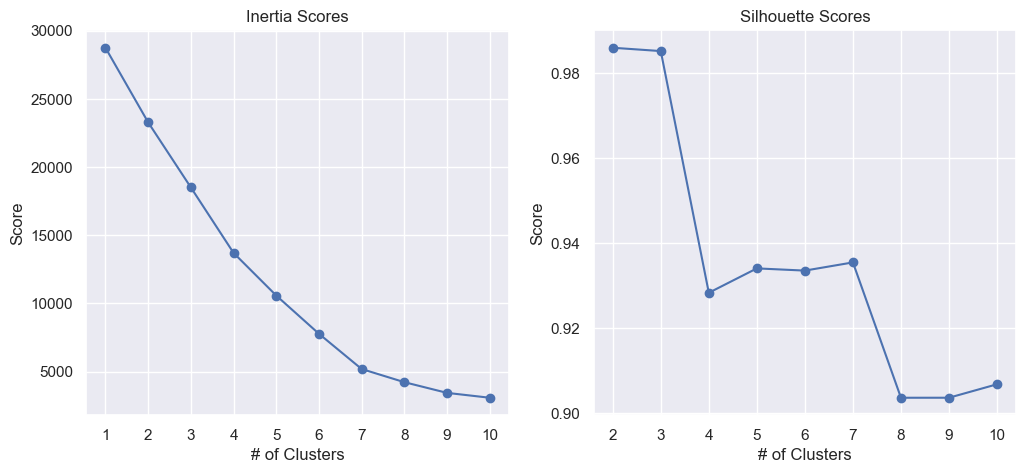

In [29]:
# Define X
X = df4[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

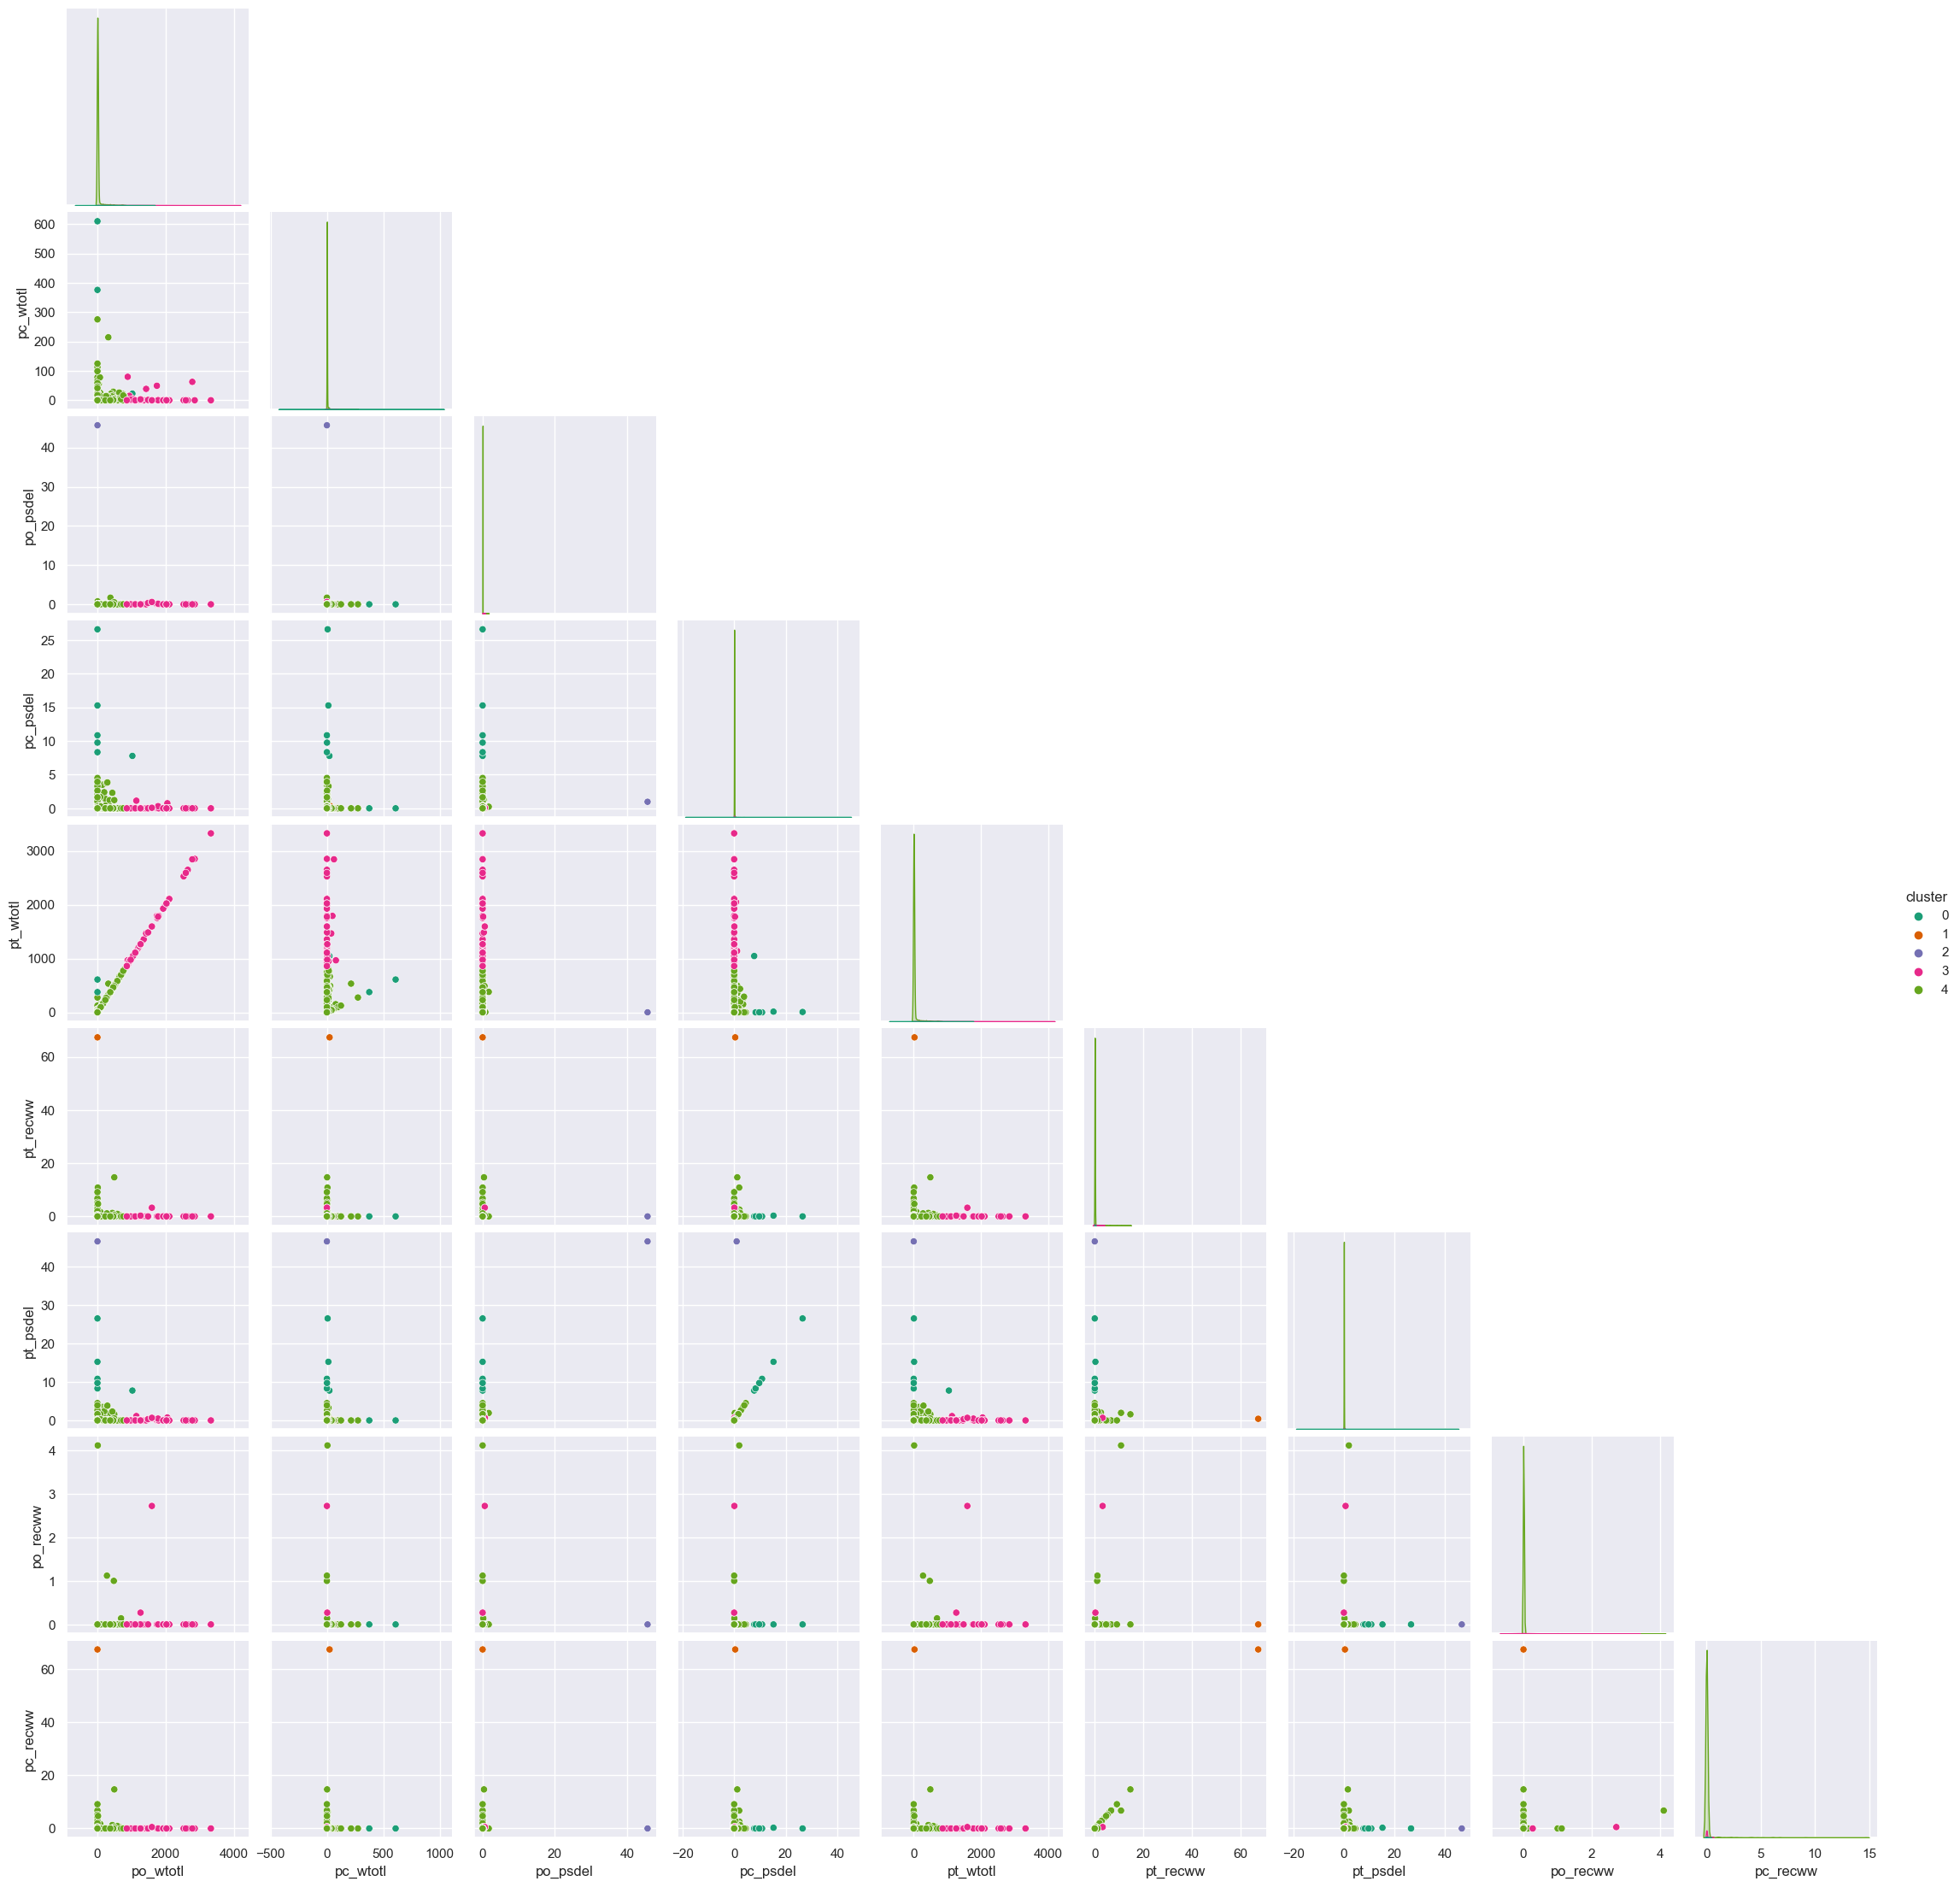

In [30]:
km4 = KMeans(n_clusters=5, n_init='auto', random_state=42)
km4.fit(Z)

df4['cluster'] = km4.labels_
df4.head()

sns.pairplot(data = df4,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');

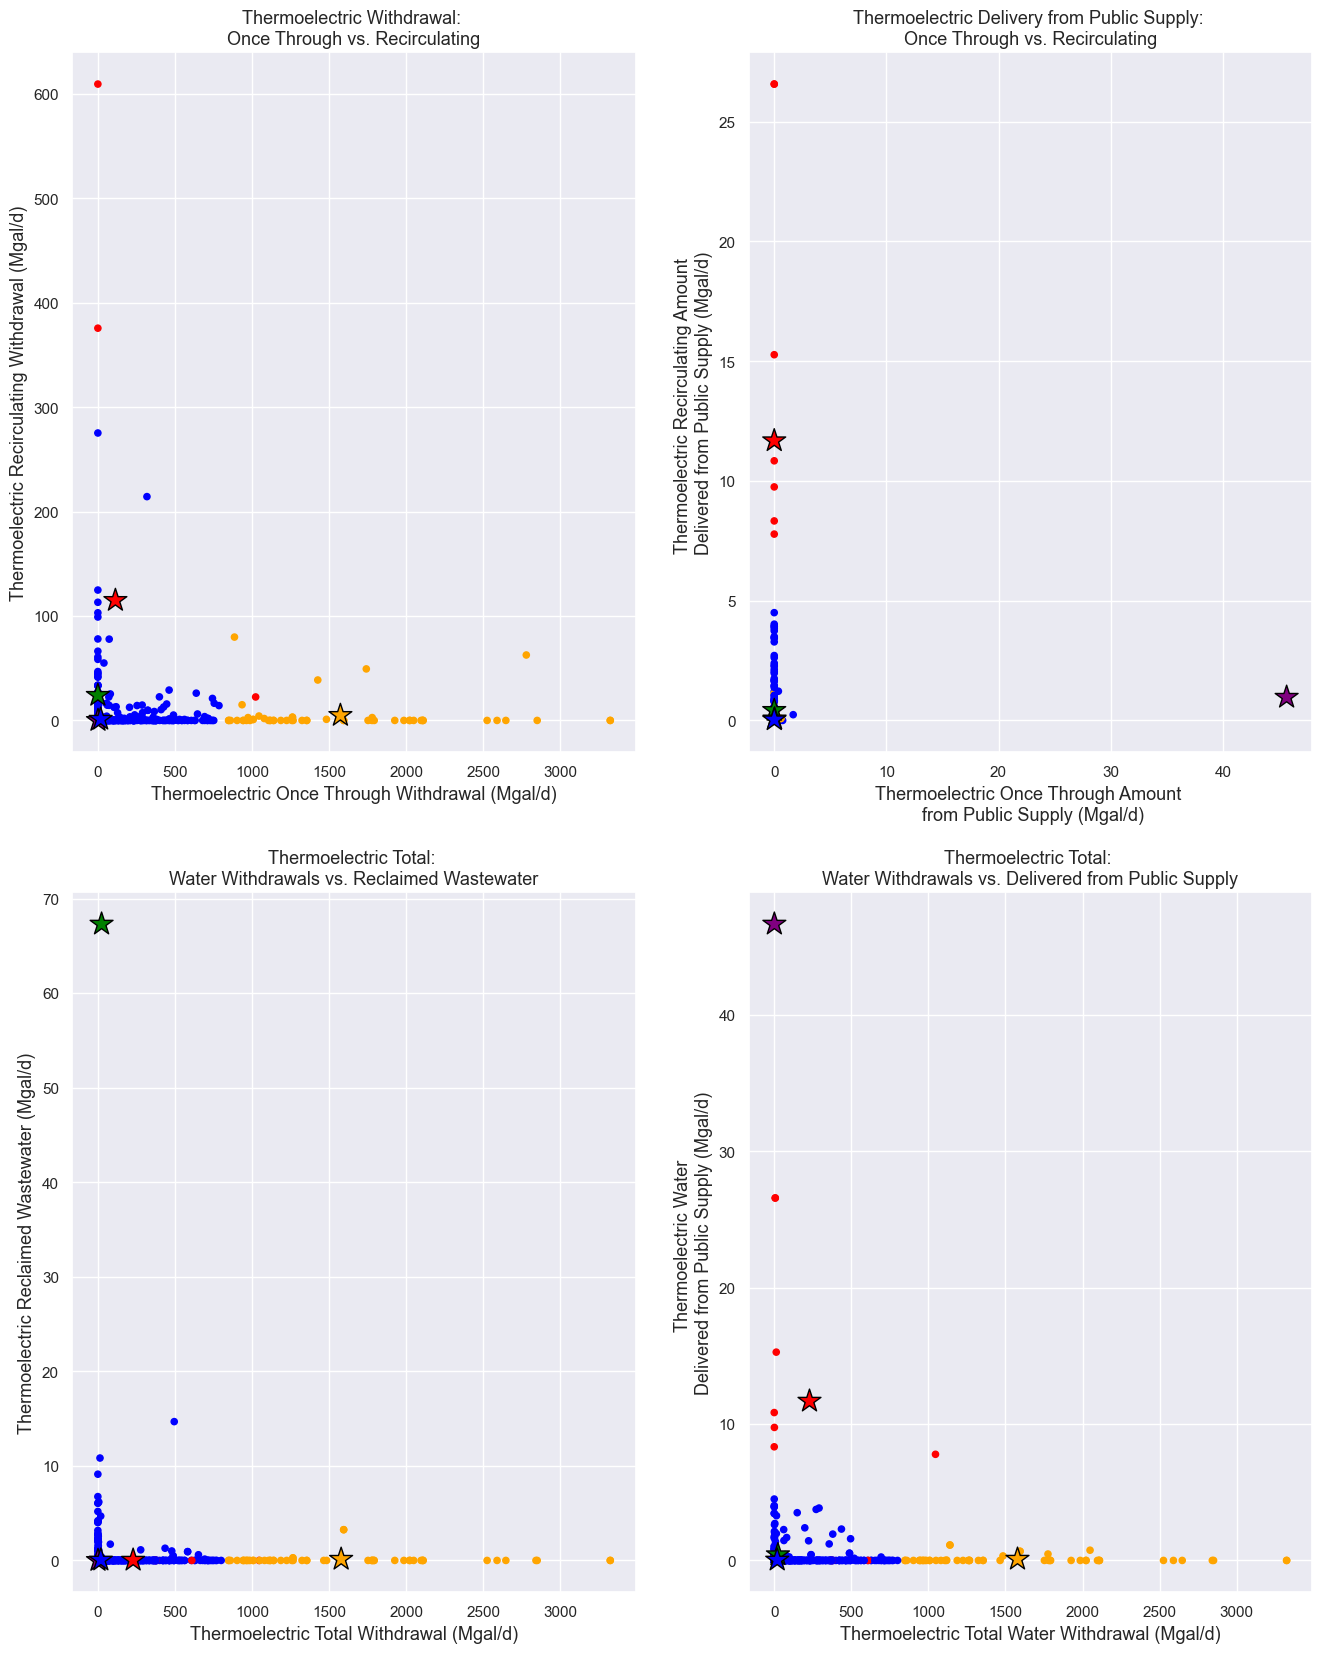

In [31]:
centroids = sc.inverse_transform(km4.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

fig, ax = plt.subplots(2,2)
fg = (16,20)

colors = ["red", "green", 'purple', 'orange', 'blue']
df4['color'] = df4['cluster'].map(lambda p: colors[p])

# Plot points
df4.plot(
    kind="scatter",
    x="po_wtotl",
    y="pc_wtotl",
    figsize=fg,
    c=df4['color'],
    ax=ax[0,0]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="po_wtotl",
    y="pc_wtotl",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0,0]
)
# Labels
ax[0,0].set_title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=13);
ax[0,0].set_xlabel("Thermoelectric Once Through Withdrawal (Mgal/d)", fontsize=13)
ax[0,0].set_ylabel("Thermoelectric Recirculating Withdrawal (Mgal/d)", fontsize=13);



# Plot points
df4.plot(
    kind="scatter",
    x="po_psdel",
    y="pc_psdel",
    figsize=fg,
    c=df4['color'],
    ax=ax[0,1]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="po_psdel",
    y="pc_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0,1]
)
# Labels
ax[0,1].set_title("Thermoelectric Delivery from Public Supply: \nOnce Through vs. Recirculating", fontsize=13)
ax[0,1].set_xlabel("Thermoelectric Once Through Amount \n from Public Supply (Mgal/d)", fontsize=13)
ax[0,1].set_ylabel("Thermoelectric Recirculating Amount \nDelivered from Public Supply (Mgal/d)", fontsize=13);




# Plot points
df4.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_recww",
    figsize=fg,
    c=df4['color'],
    ax=ax[1,0]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_recww",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1,0]
)
# Labels
ax[1,0].set_title("Thermoelectric Total: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=13)
ax[1,0].set_xlabel("Thermoelectric Total Withdrawal (Mgal/d)", fontsize=13)
ax[1,0].set_ylabel("Thermoelectric Reclaimed Wastewater (Mgal/d)", fontsize=13);



# Plot points
df4.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_psdel",
    figsize=fg,
    c=df4['color'],
    ax=ax[1,1]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1,1]
)
# Labels
ax[1,1].set_title("Thermoelectric Total: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=13)
ax[1,1].set_xlabel("Thermoelectric Total Water Withdrawal (Mgal/d)", fontsize=13)
ax[1,1].set_ylabel("Thermoelectric Water \nDelivered from Public Supply (Mgal/d)", fontsize=13);


# Show the plot
plt.show();

# Total Withdrawals vs. Public Supply

In [32]:
keep = ['to_wtotl', 'do_psdel', 
        'ps_wtotl']
df5 = df.filter(items=keep)
df5.head()

,to_wtotl,do_psdel,ps_wtotl
fips,,,
23029,47.75,0.58,1.57
13191,1.48,0.94,1.04
13179,18.46,3.18,6.42
9003,260.45,25.29,59.22
9013,9.67,3.83,4.93


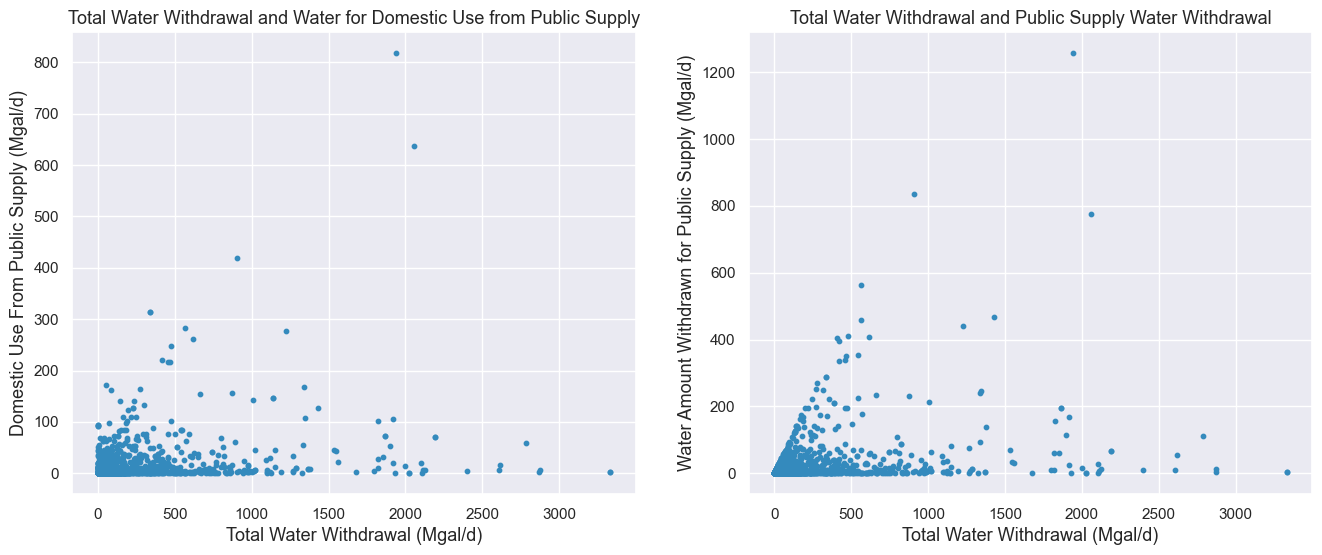

In [33]:
df5 = df.filter(items=keep)

fig, ax = plt.subplots(1,2)
f = 13
fg = (16,6)

df5.plot(kind="scatter", x="to_wtotl", y="do_psdel", figsize=fg, s=10, ax=ax[0])
ax[0].set_title("Total Water Withdrawal and Water for Domestic Use from Public Supply", fontsize=f);
ax[0].set_xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
ax[0].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=f);

df5.plot(kind="scatter", x="to_wtotl", y="ps_wtotl", figsize=fg, s=10, ax=ax[1])
ax[1].set_title("Total Water Withdrawal and Public Supply Water Withdrawal", fontsize=f)
ax[1].set_xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
ax[1].set_ylabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=f);

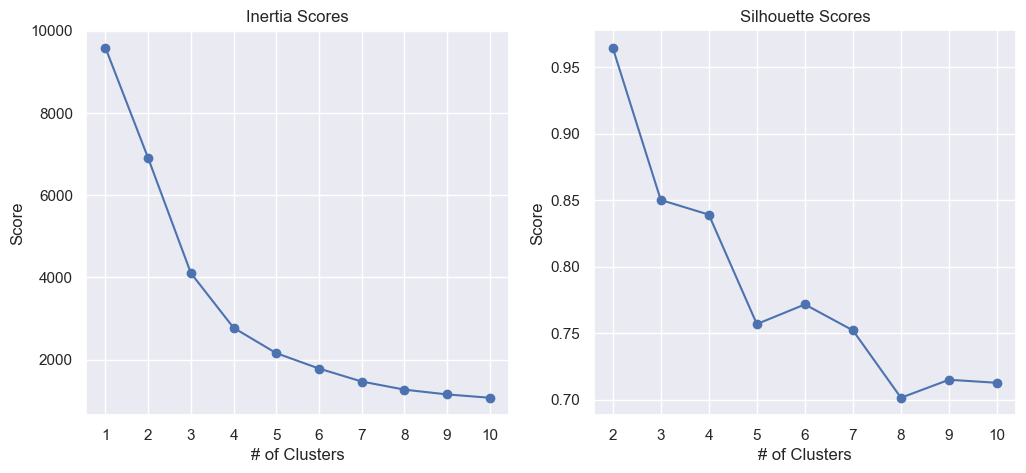

In [34]:
# Define X
X = df5[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

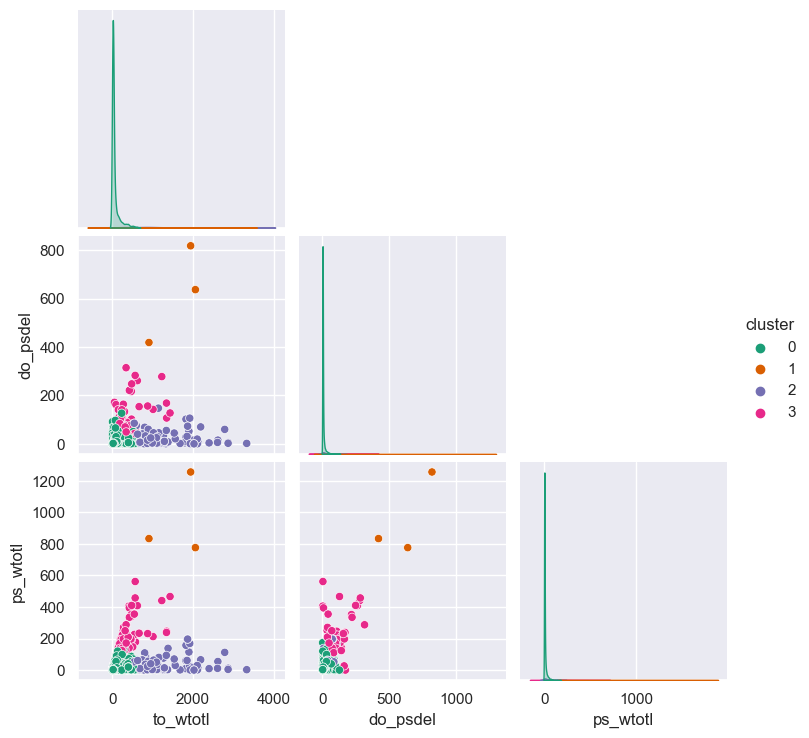

In [35]:
km5 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km5.fit(Z)

df5['cluster'] = km5.labels_
df5.head()

sns.pairplot(data = df5,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');

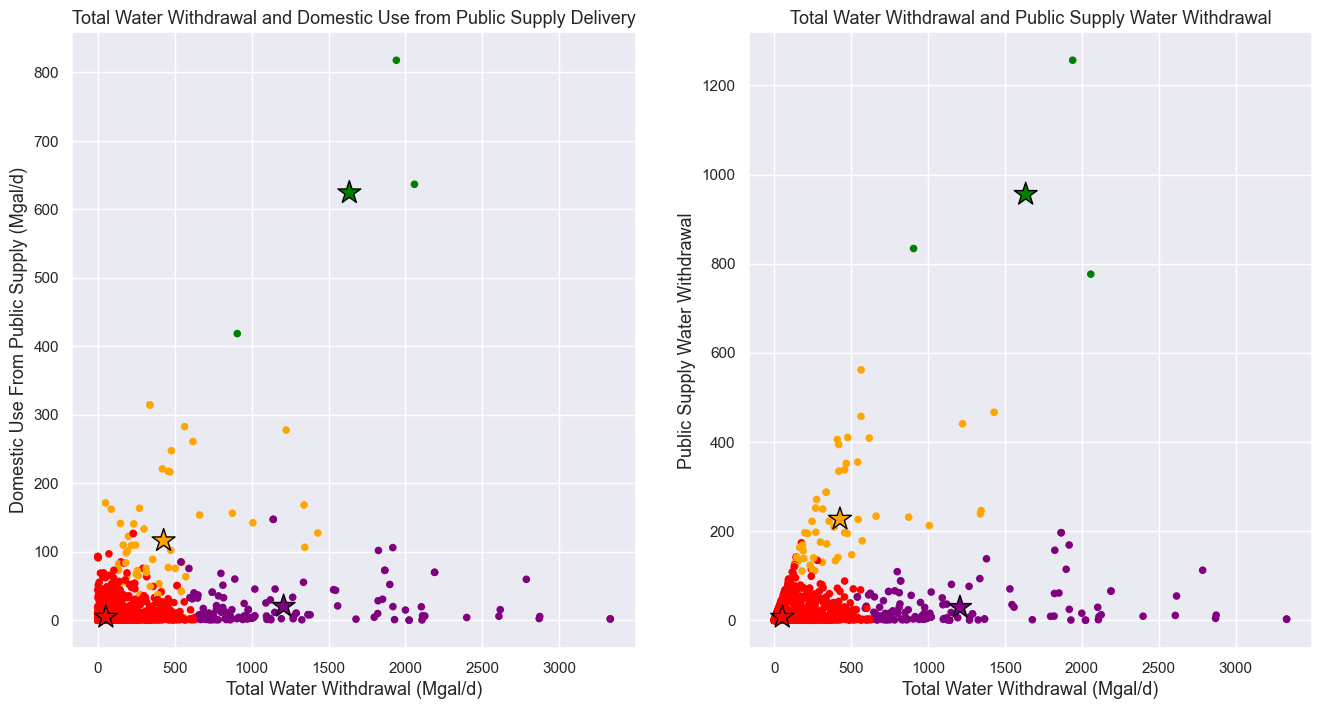

In [36]:
centroids = sc.inverse_transform(km5.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

fig, ax = plt.subplots(1,2)
fg = (16,8)

colors = ["red", "green", 'purple', 'orange']
df5['color'] = df5['cluster'].map(lambda p: colors[p])

# Plot points
df5.plot(
    kind="scatter",
    x="to_wtotl",
    y="do_psdel",
    figsize=fg,
    c=df5['color'],
    ax=ax[0]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="to_wtotl",
    y="do_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0]
)
# Labels
ax[0].set_title("Total Water Withdrawal and Domestic Use from Public Supply Delivery", fontsize=13);
ax[0].set_xlabel("Total Water Withdrawal (Mgal/d)", fontsize=13)
ax[0].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=13);



# Plot points
df5.plot(
    kind="scatter",
    x="to_wtotl",
    y="ps_wtotl",
    figsize=fg,
    c=df5['color'],
    ax=ax[1]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="to_wtotl",
    y="ps_wtotl",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1]
)
# Labels
ax[1].set_title("Total Water Withdrawal and Public Supply Water Withdrawal", fontsize=13)
ax[1].set_xlabel("Total Water Withdrawal (Mgal/d)", fontsize=13)
ax[1].set_ylabel("Public Supply Water Withdrawal", fontsize=13);

# Show the plot
plt.show();

# Revisualizing to 300 Clusters

## Showing 25 Clusters
For the ease and digestibility of data visualization that will be presented, we are outputting our charts showing only 25 cluster-centroids.

In [37]:
os.getcwd()
os.chdir('../group-project')

In [38]:
clust = 300
show_clust = 25
f = 13

def reviz(df, km):
    km = KMeans(n_clusters=clust, n_init='auto', random_state=42)
    km.fit(Z)
    df['cluster'] = km.labels_

    # Create a colormap
    cluster_labels = km.labels_
    colormap = plt.cm.Spectral(np.linspace(0, 1, show_clust))

    # Map colors for different clusters
    colors = []
    for i in range(25):
        color = colormap[i]
        colors.append(color)

    # Plot the clusters
    for i in range(25):
        cluster_indices = np.where(cluster_labels == i)[0]
        plt.scatter(Z[cluster_indices, 0], Z[cluster_indices, 1], c=colors[i])

    # Plot Centroids
    centroids = sc.inverse_transform(km.cluster_centers_)
    
    #print(centroids)
    return plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors)

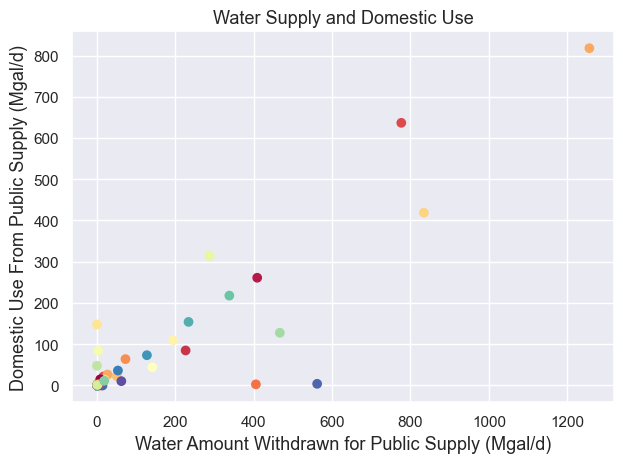

In [39]:
X = df1[['ps_wtotl', 'do_psdel']]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df1, km1)

# Labels
plt.title('Water Supply and Domestic Use', fontsize=f)
plt.xlabel('Water Amount Withdrawn for Public Supply (Mgal/d)', fontsize=f)
plt.ylabel('Domestic Use From Public Supply (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/ps_withdrawal_do.png')
plt.show();

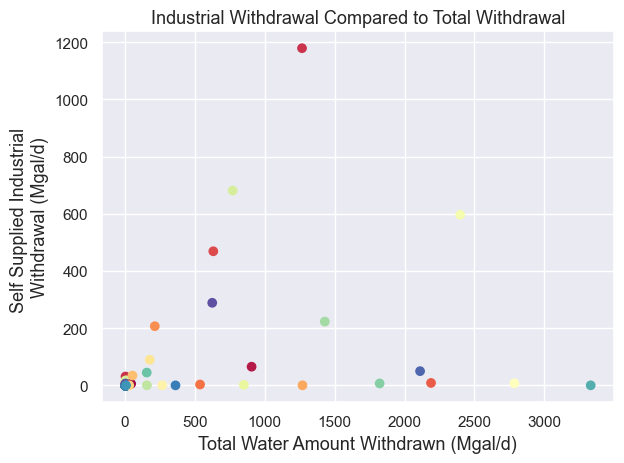

In [40]:
keep = ['to_wtotl', 'in_wtotl']
X = df2[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df2, km2)

# Labels
plt.title('Industrial Withdrawal Compared to Total Withdrawal', fontsize=f)
plt.xlabel('Total Water Amount Withdrawn (Mgal/d)', fontsize=f)
plt.ylabel('Self Supplied Industrial \nWithdrawal (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/tot_vs_industrial_withdrawal.png')
plt.show();

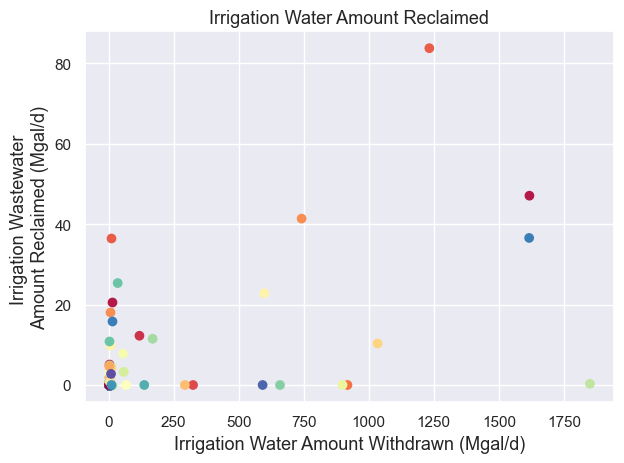

In [41]:
keep = ['ir_wfrto', 'ir_recww', 'ic_wfrto', 'ic_recww', 'ig_wfrto', 'ig_recww'] # Data visualization only includes first two variables
X = df3[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df3, km3)

# Labels
plt.title('Irrigation Water Amount Reclaimed', fontsize=f)
plt.xlabel('Irrigation Water Amount Withdrawn (Mgal/d)', fontsize=f)
plt.ylabel('Irrigation Wastewater \nAmount Reclaimed (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/irrigation_withdraw_vs_reclaimed.png')
plt.show();

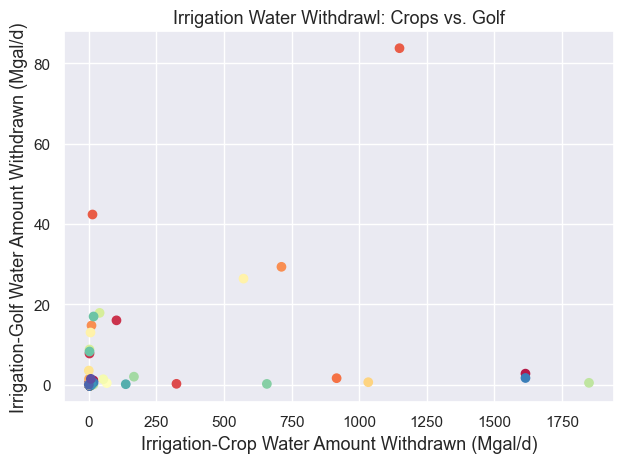

In [42]:
keep = ['ic_wfrto', 'ig_wfrto', 'ir_wfrto', 'ir_recww', 'ic_recww', 'ig_recww'] # Data visualization only includes first two variables
X = df3[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df3, km3)

# Labels
plt.title('Irrigation Water Withdrawl: Crops vs. Golf', fontsize=f)
plt.xlabel('Irrigation-Crop Water Amount Withdrawn (Mgal/d)', fontsize=f)
plt.ylabel('Irrigation-Golf Water Amount Withdrawn (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/irrigation_crop_golf.png')
plt.show();

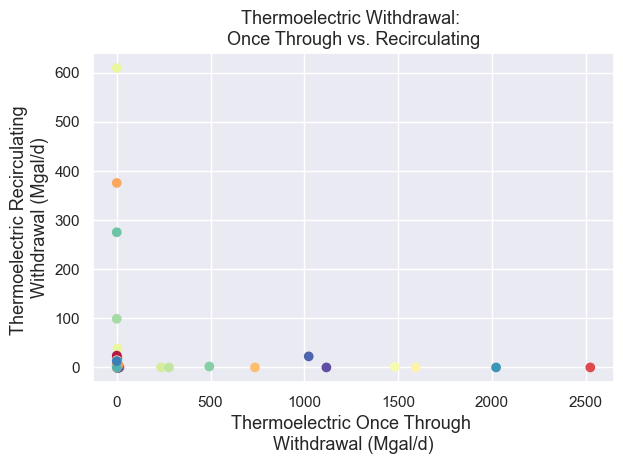

In [43]:
keep = ['po_wtotl', 'pc_wtotl', 
        'po_psdel', 'pc_psdel', 
        'pt_wtotl', 'pt_recww', 
                    'pt_psdel', 
        'po_recww', 'pc_recww'] # Data visualization only includes first two variables
X = df4[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df4, km4)

# Labels
plt.title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=f);
plt.xlabel("Thermoelectric Once Through \nWithdrawal (Mgal/d)", fontsize=f)
plt.ylabel("Thermoelectric Recirculating \nWithdrawal (Mgal/d)", fontsize=f);

plt.tight_layout()
plt.savefig('./images/thermo_once_thru_vs_recirc.png')
plt.show();

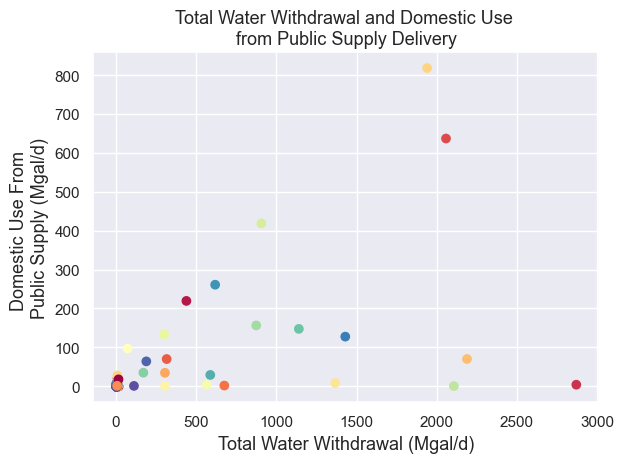

In [44]:
keep = ['to_wtotl', 'do_psdel', 'ps_wtotl'] # Data visualization only includes first two variables
X = df5[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df5, km5)

plt.title("Total Water Withdrawal and Domestic Use \nfrom Public Supply Delivery", fontsize=f)
plt.xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
plt.ylabel("Domestic Use From \nPublic Supply (Mgal/d)", fontsize=f);

plt.tight_layout()
plt.savefig('./images/tot_withdraw_vs_do.png')
plt.show();

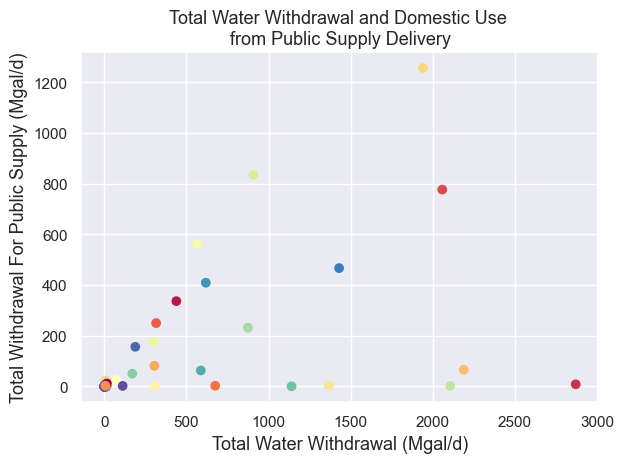

In [45]:
keep = ['to_wtotl', 'ps_wtotl', 'do_psdel'] # Data visualization only includes first two variables
X = df5[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df5, km5);

plt.title("Total Water Withdrawal and Domestic Use \nfrom Public Supply Delivery", fontsize=f);
plt.xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
plt.ylabel("Total Withdrawal For Public Supply (Mgal/d)", fontsize=f);

plt.tight_layout()
plt.savefig('./images/tot_withdraw_vs_ps.png')
plt.show();

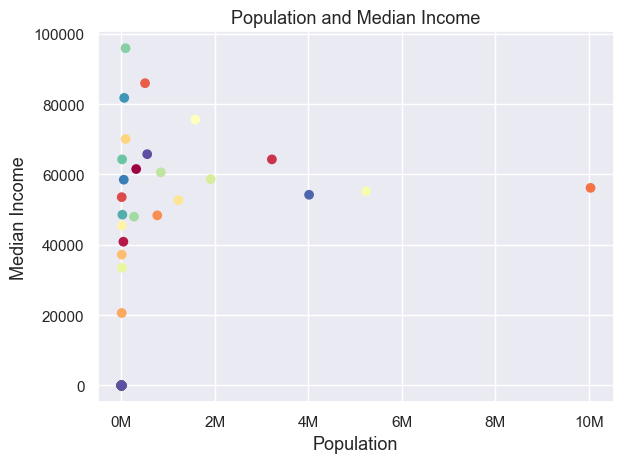

In [46]:
# Last Cluster - Population and Income (Not Explored Yet Above)
clust = 300
show_clust = 25
f = 13

keep = ['population', 'median_household_income']
df6 = df.filter(items=keep)
X = df6[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

km = KMeans(n_clusters=clust, n_init='auto', random_state=42)
km.fit(Z)
df['cluster'] = km.labels_

# Create a colormap
cluster_labels = km.labels_
colormap = plt.cm.Spectral(np.linspace(0, 1, show_clust))

# Map colors for different clusters
colors = []
for i in range(25):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(25):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(Z[cluster_indices, 0], Z[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km.cluster_centers_)

plt.scatter(centroids[0:25, 0], centroids[0:25, 1], c=colors)

# Labels
plt.title('Population and Median Income', fontsize=f)
plt.xlabel('Population', fontsize=f)
plt.ylabel('Median Income', fontsize=f)

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/10**6:.0f}M'))


plt.tight_layout()
plt.savefig('./images/median_income.png')
plt.show();

In [47]:
df6.head()

,population,median_household_income
fips,,
23029,32191.0,38083.0
13191,14007.0,42988.0
13179,64427.0,42201.0
9003,896943.0,66395.0
9013,151948.0,79626.0


## Showing 300 Clusters
For the purposes of modeling and our interactive application, these charts include/show all 300 cluster-centroids.

In [48]:
# Population and Income Cluster
clust = 300
show_clust = 300
f = 13

def reviz(df, km):
    km = KMeans(n_clusters=clust, n_init='auto', random_state=42)
    km.fit(Z)
    df['cluster'] = km.labels_

    # Create a colormap
    cluster_labels = km.labels_
    colormap = plt.cm.Spectral(np.linspace(0, 1, show_clust))

    # Map colors for different clusters
    colors = []
    for i in range(clust):
        color = colormap[i]
        colors.append(color)

    # Plot the clusters
    for i in range(clust):
        cluster_indices = np.where(cluster_labels == i)[0]
        plt.scatter(Z[cluster_indices, 0], Z[cluster_indices, 1], c=colors[i])

    # Plot Centroids
    centroids = sc.inverse_transform(km.cluster_centers_)
    
    #print(centroids)
    return plt.scatter(centroids[0:clust, 0], centroids[0:clust, 1], c=colors)

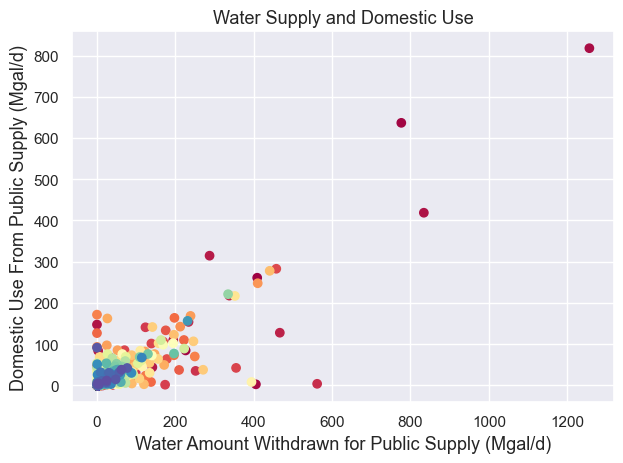

In [49]:
X = df1[['ps_wtotl', 'do_psdel']]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df1, km1)

# Labels
plt.title('Water Supply and Domestic Use', fontsize=f)
plt.xlabel('Water Amount Withdrawn for Public Supply (Mgal/d)', fontsize=f)
plt.ylabel('Domestic Use From Public Supply (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/ps_withdrawal_do_300.png')
plt.show();

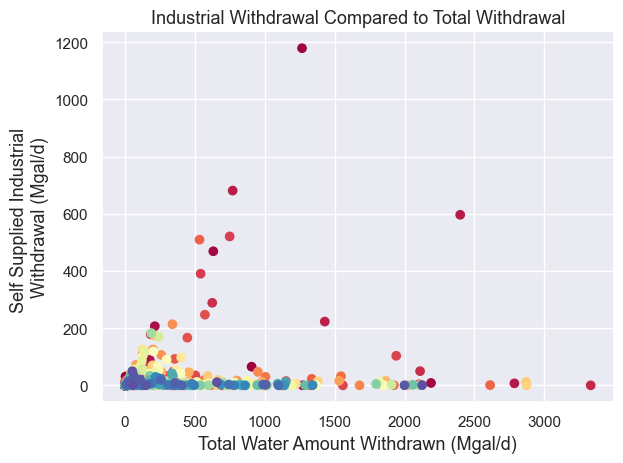

In [50]:
keep = ['to_wtotl', 'in_wtotl']
X = df2[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df2, km2)

# Labels
plt.title('Industrial Withdrawal Compared to Total Withdrawal', fontsize=f)
plt.xlabel('Total Water Amount Withdrawn (Mgal/d)', fontsize=f)
plt.ylabel('Self Supplied Industrial \nWithdrawal (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/tot_vs_industrial_withdrawal_300.png')
plt.show();

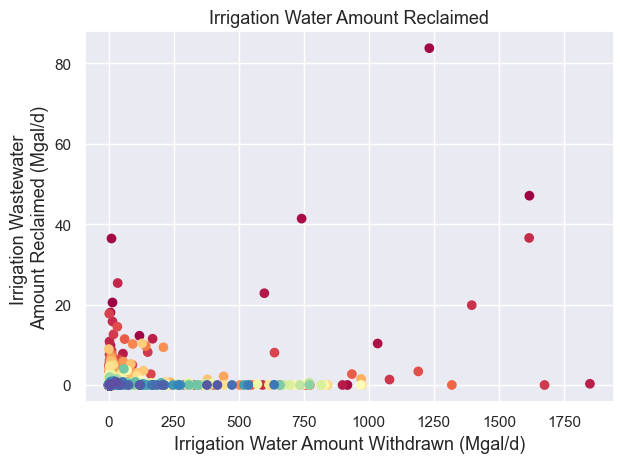

In [51]:
keep = ['ir_wfrto', 'ir_recww', 'ic_wfrto', 'ic_recww', 'ig_wfrto', 'ig_recww'] # Data visualization only includes first two variables
X = df3[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df3, km3)

# Labels
plt.title('Irrigation Water Amount Reclaimed', fontsize=f)
plt.xlabel('Irrigation Water Amount Withdrawn (Mgal/d)', fontsize=f)
plt.ylabel('Irrigation Wastewater \nAmount Reclaimed (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/irrigation_withdraw_vs_reclaimed_300.png')
plt.show();

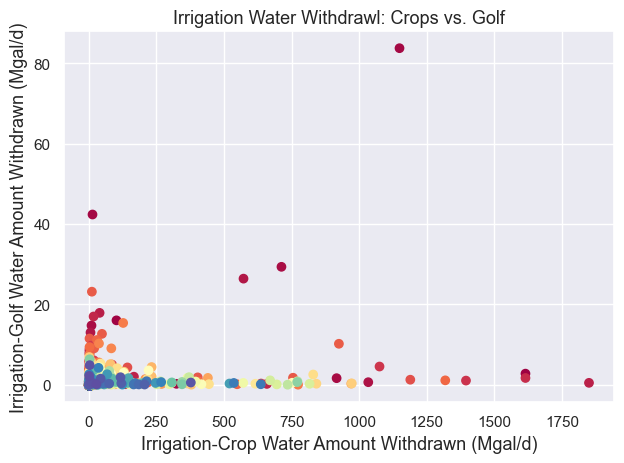

In [52]:
keep = ['ic_wfrto', 'ig_wfrto', 'ir_wfrto', 'ir_recww', 'ic_recww', 'ig_recww'] # Data visualization only includes first two variables
X = df3[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df3, km3)

# Labels
plt.title('Irrigation Water Withdrawl: Crops vs. Golf', fontsize=f)
plt.xlabel('Irrigation-Crop Water Amount Withdrawn (Mgal/d)', fontsize=f)
plt.ylabel('Irrigation-Golf Water Amount Withdrawn (Mgal/d)', fontsize=f)

plt.tight_layout()
plt.savefig('./images/irrigation_crop_golf_300.png')
plt.show();

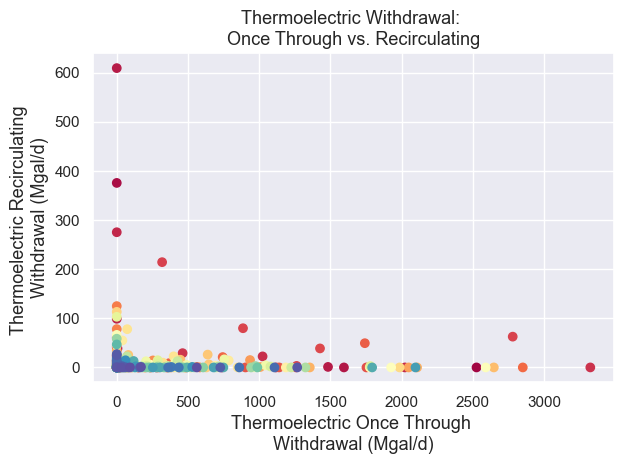

In [53]:
keep = ['po_wtotl', 'pc_wtotl', 
        'po_psdel', 'pc_psdel', 
        'pt_wtotl', 'pt_recww', 
                    'pt_psdel', 
        'po_recww', 'pc_recww'] # Data visualization only includes first two variables
X = df4[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df4, km4)

# Labels
plt.title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=f);
plt.xlabel("Thermoelectric Once Through \nWithdrawal (Mgal/d)", fontsize=f)
plt.ylabel("Thermoelectric Recirculating \nWithdrawal (Mgal/d)", fontsize=f);

plt.tight_layout()
plt.savefig('./images/thermo_once_thru_vs_recirc_300.png')
plt.show();

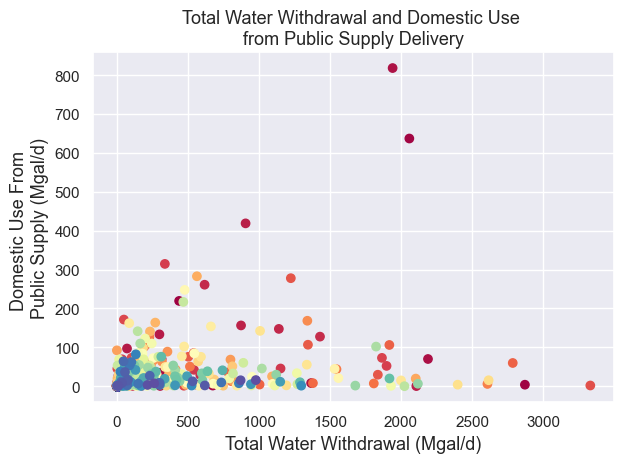

In [54]:
keep = ['to_wtotl', 'do_psdel', 'ps_wtotl'] # Data visualization only includes first two variables
X = df5[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df5, km5)

plt.title("Total Water Withdrawal and Domestic Use \nfrom Public Supply Delivery", fontsize=f)
plt.xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
plt.ylabel("Domestic Use From \nPublic Supply (Mgal/d)", fontsize=f);

plt.tight_layout()
plt.savefig('./images/tot_withdraw_vs_do_300.png')
plt.show();

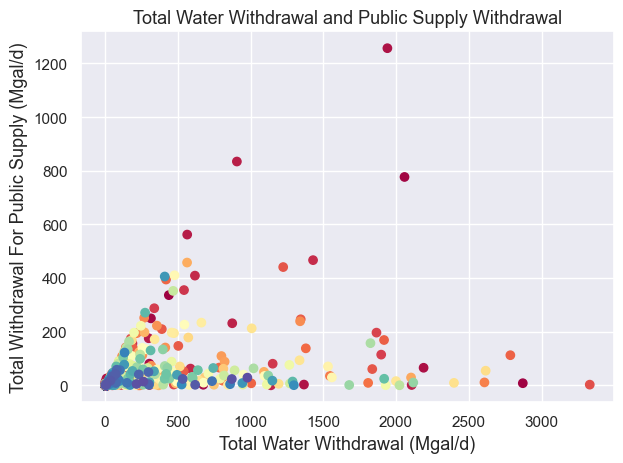

In [55]:
keep = ['to_wtotl', 'ps_wtotl', 'do_psdel'] # Data visualization only includes first two variables
X = df5[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

reviz(df5, km5);

plt.title("Total Water Withdrawal and Public Supply Withdrawal", fontsize=f);
plt.xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
plt.ylabel("Total Withdrawal For Public Supply (Mgal/d)", fontsize=f);

plt.tight_layout()
plt.savefig('./images/tot_withdraw_vs_ps_300.png')
plt.show();

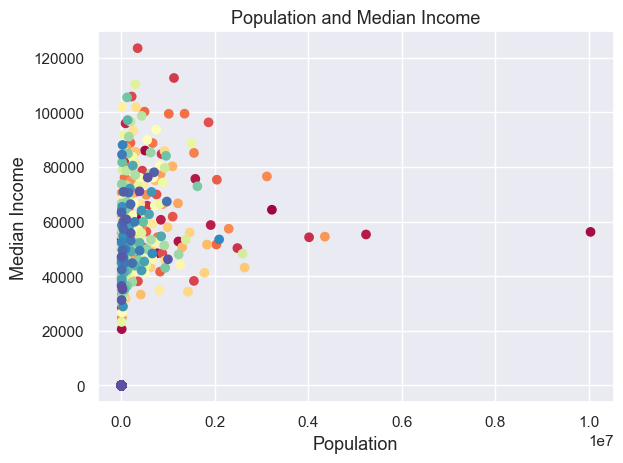

In [56]:
# Population and Income Cluster
clust = 300
show_clust = 300
f = 13

keep = ['population', 'median_household_income']
df6 = df.filter(items=keep)
X = df6[keep]
sc = StandardScaler()
Z = sc.fit_transform(X)

km6 = KMeans(n_clusters=clust, n_init='auto', random_state=42)
km6.fit(Z)
df6['cluster'] = km6.labels_

# Create a colormap
cluster_labels = km6.labels_
colormap = plt.cm.Spectral(np.linspace(0, 1, show_clust))

# Map colors for different clusters
colors = []
for i in range(clust):
    color = colormap[i]
    colors.append(color)

# Plot the clusters
for i in range(clust):
    cluster_indices = np.where(cluster_labels == i)[0]
    plt.scatter(Z[cluster_indices, 0], Z[cluster_indices, 1], c=colors[i])

# Plot Centroids
centroids = sc.inverse_transform(km6.cluster_centers_)
    
#print(centroids)
plt.scatter(centroids[0:clust, 0], centroids[0:clust, 1], c=colors)

# Labels
plt.title('Population and Median Income', fontsize=f)
plt.xlabel('Population', fontsize=f)
plt.ylabel('Median Income', fontsize=f)

plt.tight_layout()
plt.savefig('./images/median_income_300.png')
plt.show();

# Output Clusters For Tableau Model

In [57]:
df1.head()

,ps_wtotl,do_psdel,state,cluster,color
fips,,,,,
23029,1.57,0.58,ME,243,red
13191,1.04,0.94,GA,170,red
13179,6.42,3.18,GA,163,red
9003,59.22,25.29,CT,261,purple
9013,4.93,3.83,CT,235,red


In [58]:
cluster1 = df1.rename(columns = {'cluster': 'cluster_model1'})
cluster1.to_csv('../group-project/clean-data/cluster1_ps_withdrawal_domestic_use.csv')

In [59]:
df3.head()

,ir_wfrto,ir_recww,ic_wfrto,ic_recww,ig_wfrto,ig_recww,cluster,color
fips,,,,,,,,
23029,7.37,0.0,7.34,0.0,0.03,0.0,240,red
13191,0.16,0.0,0.00,0.0,0.16,0.0,37,red
13179,0.00,0.0,0.00,0.0,0.00,0.0,263,red
9003,4.09,0.0,2.41,0.0,1.68,0.0,138,red
9013,0.50,0.0,0.23,0.0,0.27,0.0,181,red


In [60]:
cluster2 = df3.drop(columns=['ic_wfrto', 'ic_recww', 'ig_wfrto', 'ig_recww']).rename(columns = {'cluster': 'cluster_model2'})
cluster2.to_csv('../group-project/clean-data/cluster2_irrigation_withdrawal_vs_reclaimed.csv')

In [61]:
df5.head()

,to_wtotl,do_psdel,ps_wtotl,cluster,color
fips,,,,,
23029,47.75,0.58,1.57,239,red
13191,1.48,0.94,1.04,295,red
13179,18.46,3.18,6.42,236,red
9003,260.45,25.29,59.22,233,red
9013,9.67,3.83,4.93,236,red


In [62]:
cluster3 = df5.drop(columns=['do_psdel']).rename(columns = {'cluster': 'cluster_model3'})
cluster3.to_csv('../group-project/clean-data/cluster3_total_and_ps_withdrawal.csv')

In [63]:
df6.head()

,population,median_household_income,cluster
fips,,,
23029,32191.0,38083.0,172
13191,14007.0,42988.0,150
13179,64427.0,42201.0,244
9003,896943.0,66395.0,89
9013,151948.0,79626.0,71


In [64]:
cluster4 = df6.rename(columns = {'cluster': 'cluster_model4'})
cluster4.to_csv('../group-project/clean-data/cluster4_median_income.csv')

In [65]:
# Merge into Combined data

comb = pd.read_csv('../group-project/clean-data/combined.csv')

comb2 = comb.merge(cluster1.filter(items=['cluster_model1']), how = 'left', on = 'fips')
comb3 = comb2.merge(cluster2.filter(items=['cluster_model2']), how = 'left', on = 'fips')
comb4 = comb3.merge(cluster3.filter(items=['cluster_model3']), how = 'left', on = 'fips')
comb5 = comb4.merge(cluster4.filter(items=['cluster_model4']), how = 'left', on = 'fips')

In [66]:
comb5.head()

,state,countyname,fips,lon,lat,tp_totpop,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,...,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,cluster_model1,cluster_model2,cluster_model3,cluster_model4
0,ME,Washington,23029,-67.6361,45.0363,31.625,9.446,1.9,11.346,1.38,...,86.78,13.22,0.00,0.0,0.0,0.0,243,240,239,172
1,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.0,10.497,1.04,...,75.07,24.93,2.25,0.0,0.0,0.0,170,37,295,150
2,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.0,10.497,1.04,...,75.07,24.93,2.25,0.0,0.0,0.0,170,37,295,150
3,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.0,10.497,1.04,...,75.07,24.93,2.25,0.0,0.0,0.0,170,37,295,150
4,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.0,10.497,1.04,...,75.07,24.93,2.25,0.0,0.0,0.0,170,37,295,150


In [67]:
comb5.cluster_model1.value_counts()

165    1062
111     424
278     395
15      313
170     281
       ... 
49        1
153       1
9         1
248       1
89        1
Name: cluster_model1, Length: 300, dtype: int64

In [68]:
comb5.cluster_model2.value_counts()

263    1305
143    1024
54      658
173     437
37      321
       ... 
110       1
33        1
9         1
168       1
129       1
Name: cluster_model2, Length: 300, dtype: int64

In [69]:
comb5.cluster_model3.value_counts()

109    1070
105     640
295     581
6       452
202     292
       ... 
299       1
273       1
122       1
147       1
128       1
Name: cluster_model3, Length: 300, dtype: int64

In [70]:
comb5.cluster_model4.value_counts()

228    1033
165     412
177     110
150      95
223      79
       ... 
130       1
135       1
25        1
99        1
210       1
Name: cluster_model4, Length: 300, dtype: int64

In [72]:
comb5.to_csv('../group-project/clean-data/combined2.csv', index=False)